###### In this Notebook we are going to understand the data of patients, discuss information we gain from it and build Machine Learning model

In [1]:
!pip install xgboost

In [2]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import stats
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report


In [3]:
#import data
df = pd.read_csv("disease_dataset.csv")
df.head()

,PatientID,FollowupDays,FinalStatus,Medication,Age,Gender,AscitesStatus,LiverSize,SpiderAngiomas,FluidAccumulationSwelling,...,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,PlateletsCount,ProthrombinLevel,StageofDisease,DiureticTherapy
0,1,1990,death,NaN,23843,F,NaN,NaN,NaN,absent,...,NaN,3.73,NaN,NaN,NaN,NaN,136.0,10.61,NaN,no
1,2,4747,censored,NaN,12667,F,NaN,NaN,NaN,absent,...,NaN,3.27,NaN,NaN,NaN,NaN,NaN,18.18,2.0,no
2,3,1565,censored,NaN,24961,F,NaN,NaN,NaN,absent,...,NaN,3.09,NaN,NaN,NaN,NaN,161.0,10.10,4.0,no
3,4,3249,death,Drug_A,19958,F,no fluid buildup,enlarged,normal,present or resolved,...,262.0,3.21,235.0,11433.40,106.84,93.0,211.0,12.52,3.0,not required or resolved
4,5,138,death,Drug_A,25846,M,no fluid buildup,normal,spider angiomas present,present,...,169.0,2.59,229.0,1066.56,122.11,74.0,105.0,14.24,3.0,done


In [4]:
#to understand the columns present in the data
print(df.columns)

Index(['PatientID', 'FollowupDays', 'FinalStatus', 'Medication', 'Age',
       'Gender', 'AscitesStatus', 'LiverSize', 'SpiderAngiomas',
       'FluidAccumulationSwelling', 'BilirubinLevel', 'LipidProfile1',
       'ProteinLevel', 'CuLevel', 'AlkalinePhosphateLevel', 'SGOTLevel',
       'LipidProfile2', 'PlateletsCount', 'ProthrombinLevel', 'StageofDisease',
       'DiureticTherapy'],
      dtype='object')


# 1. Data Exploration

##### a. Perform initial data exploration on the given dataset and present your findings.

In [6]:
#exploring the data further
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  418 non-null    int64  
 1   FollowupDays               418 non-null    int64  
 2   FinalStatus                418 non-null    object 
 3   Medication                 312 non-null    object 
 4   Age                        418 non-null    int64  
 5   Gender                     418 non-null    object 
 6   AscitesStatus              312 non-null    object 
 7   LiverSize                  312 non-null    object 
 8   SpiderAngiomas             312 non-null    object 
 9   FluidAccumulationSwelling  418 non-null    object 
 10  BilirubinLevel             418 non-null    float64
 11  LipidProfile1              284 non-null    float64
 12  ProteinLevel               418 non-null    float64
 13  CuLevel                    310 non-null    float64

In [7]:

print('Number of Columns: {0}'.format(len(df.columns)))

df.columns

Number of Columns: 21


Index(['PatientID', 'FollowupDays', 'FinalStatus', 'Medication', 'Age',
       'Gender', 'AscitesStatus', 'LiverSize', 'SpiderAngiomas',
       'FluidAccumulationSwelling', 'BilirubinLevel', 'LipidProfile1',
       'ProteinLevel', 'CuLevel', 'AlkalinePhosphateLevel', 'SGOTLevel',
       'LipidProfile2', 'PlateletsCount', 'ProthrombinLevel', 'StageofDisease',
       'DiureticTherapy'],
      dtype='object')

In [8]:
df.shape

(418, 21)

##### Checking for dupliacted rows

In [9]:
df.duplicated().sum()

0

There are no duplicate records present in the given data

##### Checking for unique values

In [10]:
df.nunique()

PatientID                    418
FollowupDays                 398
FinalStatus                    3
Medication                     2
Age                          344
Gender                         2
AscitesStatus                  2
LiverSize                      2
SpiderAngiomas                 2
FluidAccumulationSwelling      3
BilirubinLevel                98
LipidProfile1                201
ProteinLevel                 154
CuLevel                      158
AlkalinePhosphateLevel       295
SGOTLevel                    179
LipidProfile2                145
PlateletsCount               241
ProthrombinLevel              48
StageofDisease                 4
DiureticTherapy                3
dtype: int64

In [11]:
for column in df.columns:
    print('----------------------------------------------------------------------')
    
    print('Unique Values of {0}'.format(column))
    
    print('----------------------------------------------------------------------')
    
    print(df[column].unique())
    
    print('-----------------------------------------------------------------------')
    
    print(df[column].value_counts())

----------------------------------------------------------------------
Unique Values of PatientID
----------------------------------------------------------------------
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205

##### To find the Distribution of the features

In [12]:
#to check only categorical columns
df.select_dtypes(include="object")

,FinalStatus,Medication,Gender,AscitesStatus,LiverSize,SpiderAngiomas,FluidAccumulationSwelling,DiureticTherapy
0,death,NaN,F,NaN,NaN,NaN,absent,no
1,censored,NaN,F,NaN,NaN,NaN,absent,no
2,censored,NaN,F,NaN,NaN,NaN,absent,no
3,death,Drug_A,F,no fluid buildup,enlarged,normal,present or resolved,not required or resolved
4,death,Drug_A,M,no fluid buildup,normal,spider angiomas present,present,done
...,...,...,...,...,...,...,...,...
413,censored,Drug_B,F,no fluid buildup,normal,normal,absent,no
414,censored,Drug_B,F,no fluid buildup,normal,normal,absent,no
415,censored,Drug_B,F,no fluid buildup,enlarged,normal,absent,no
416,censored,NaN,F,NaN,NaN,NaN,absent,no


In [13]:
#to check numeric columns
df.select_dtypes(exclude="object")

,PatientID,FollowupDays,Age,BilirubinLevel,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,PlateletsCount,ProthrombinLevel,StageofDisease
0,1,1990,23843,1.11,NaN,3.73,NaN,NaN,NaN,NaN,136.0,10.61,NaN
1,2,4747,12667,1.82,NaN,3.27,NaN,NaN,NaN,NaN,NaN,18.18,2.0
2,3,1565,24961,0.71,NaN,3.09,NaN,NaN,NaN,NaN,161.0,10.10,4.0
3,4,3249,19958,2.32,262.0,3.21,235.0,11433.40,106.84,93.0,211.0,12.52,3.0
4,5,138,25846,2.42,169.0,2.59,229.0,1066.56,122.11,74.0,105.0,14.24,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,4142,12105,0.51,323.0,3.58,52.0,1255.43,123.67,79.0,220.0,10.10,3.0
414,415,3354,23292,0.61,214.0,4.07,10.0,654.48,72.01,76.0,309.0,17.27,1.0
415,416,1553,18803,1.01,324.0,3.54,95.0,964.55,112.11,175.0,283.0,9.80,3.0
416,417,2826,20118,1.41,NaN,3.86,NaN,NaN,NaN,NaN,244.0,10.40,2.0


##### To understand proportion of death vs Censored vs censored due to transplant Gender wise


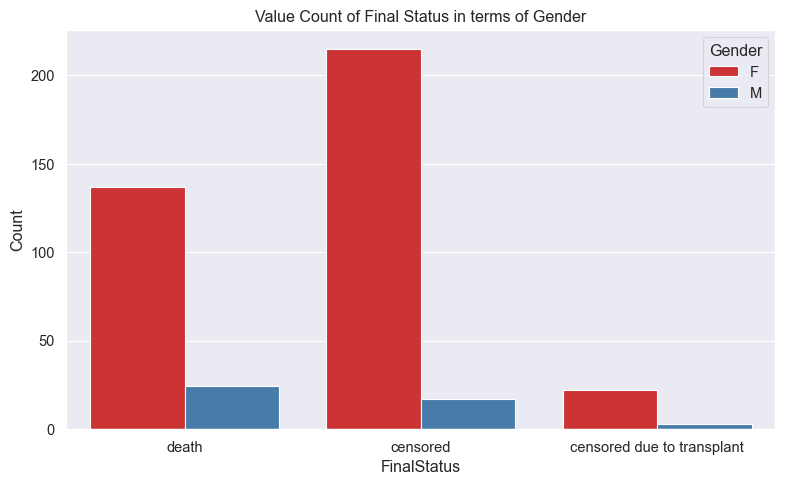

In [14]:
####Countplot
plt.figure(figsize=(8, 5))

sns.set_theme(context='paper', font_scale=1.2)

countplot = sns.countplot(x='FinalStatus', hue='Gender',  palette="Set1", data=df)

countplot.set_ylabel("Count")

countplot.set_title("Value Count of Final Status in terms of Gender")

plt.tight_layout()

From the graph we can see that overall count of death, censored and censored due to transplant is high if "Female" population as compared to "Male" population

##### Histogram of raw data before imputing missing values

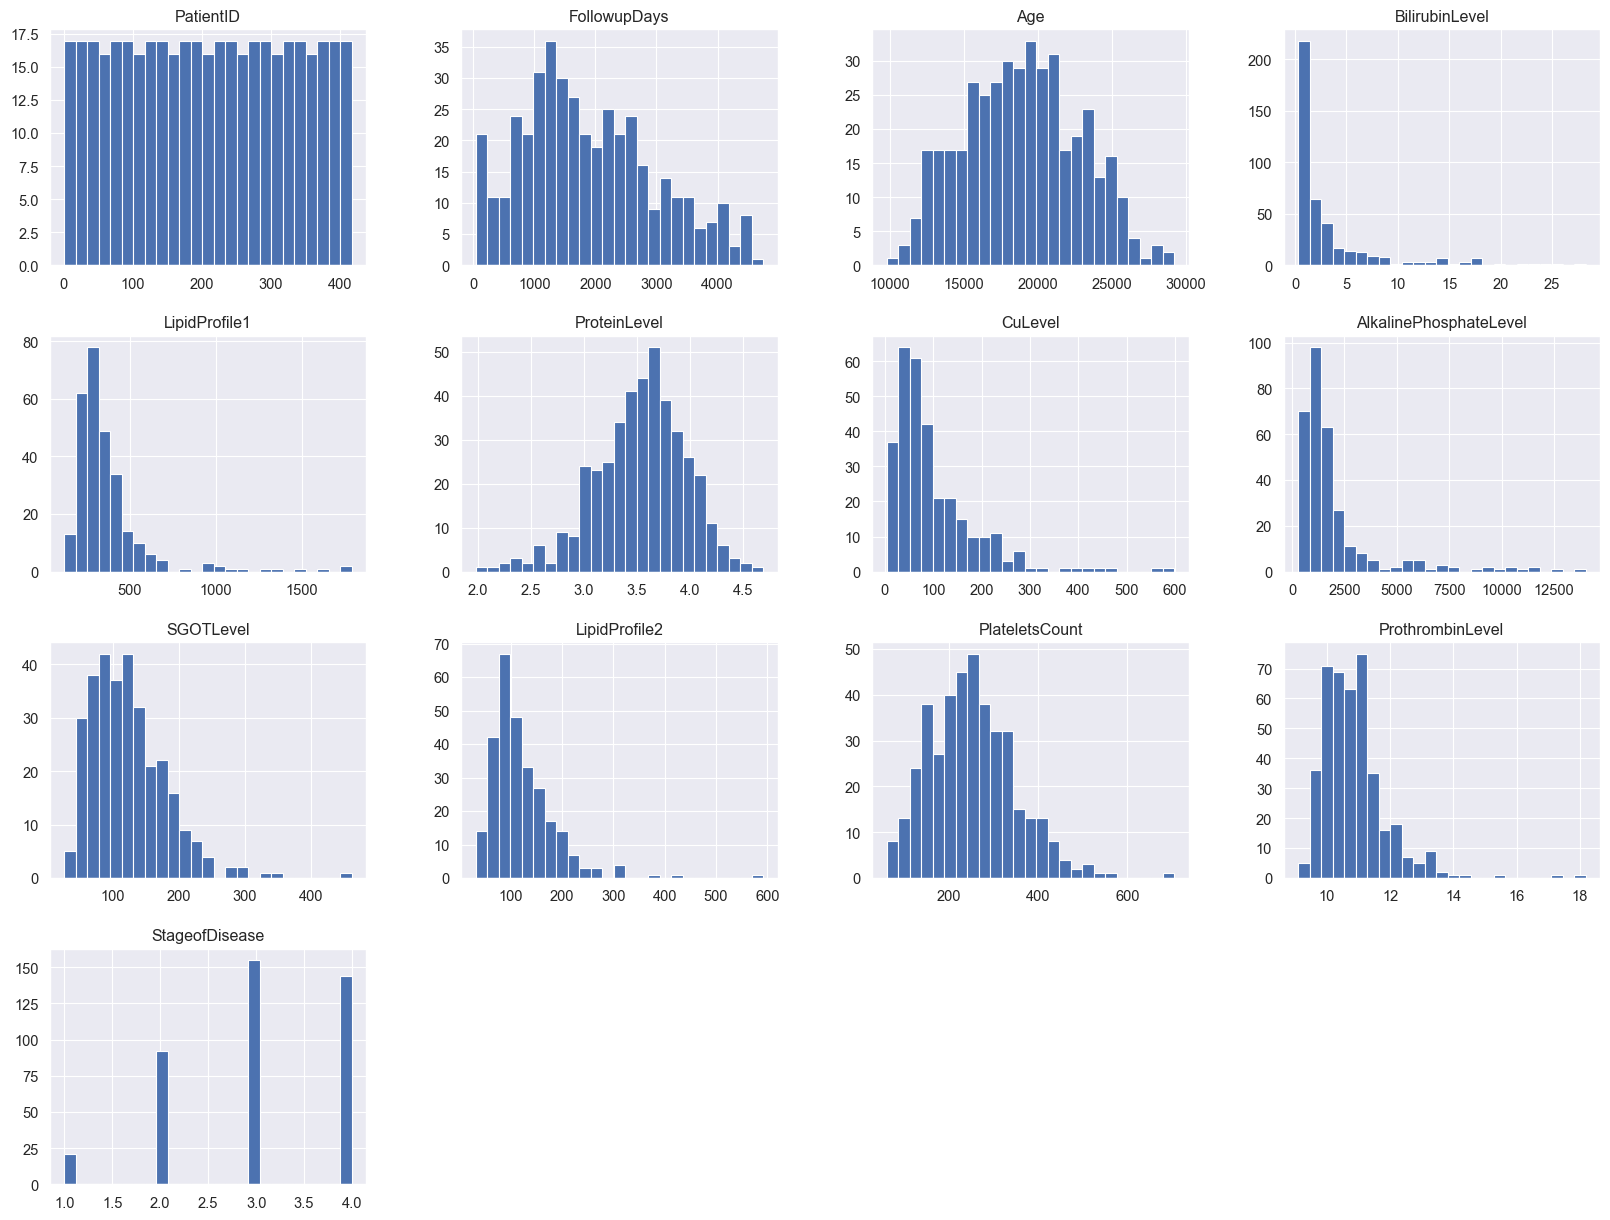

In [15]:
df.hist(bins=25, figsize=(20,15))

plt.show()

In [16]:
df.describe()

,PatientID,FollowupDays,Age,BilirubinLevel,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,PlateletsCount,ProthrombinLevel,StageofDisease
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1898.138756,18903.531100,3.253541,372.721831,3.532727,99.138710,2002.482308,123.781923,122.989362,251.398034,10.839856,3.024272
std,120.810458,1093.633738,3892.163123,4.451154,234.272040,0.429669,87.337219,2161.792714,57.266584,64.457908,96.364629,1.031880,0.882042
min,1.000000,40.000000,9789.000000,0.300000,121.000000,1.980000,4.000000,291.890000,26.610000,32.000000,60.000000,9.090000,1.000000
25%,105.250000,1081.750000,15956.750000,0.810000,251.500000,3.272500,41.250000,880.215000,81.410000,83.250000,184.500000,10.100000,2.000000
50%,209.500000,1712.000000,19000.000000,1.410000,312.500000,3.570000,74.000000,1271.590000,115.850000,106.000000,245.000000,10.710000,3.000000
75%,313.750000,2586.500000,21697.250000,3.430000,404.000000,3.810000,125.000000,1999.800000,153.420000,149.000000,311.000000,11.210000,4.000000
max,418.000000,4747.000000,29223.000000,28.280000,1792.000000,4.690000,599.000000,14001.020000,461.820000,592.000000,706.000000,18.180000,4.000000


Average mean for each feature fluctuates a lot fromeach other

##### Missing Values check

In [17]:
missing_value_count = df.isnull().sum()
missing_value_percentage = df.isnull().mean()*100 
missing_value_count_percentage_df = pd.concat([missing_value_count, missing_value_percentage], axis = 1, keys = ['Count', 'Percentage'])
missing_value_count_percentage_df = missing_value_count_percentage_df.sort_values(by = ['Count'])
missing_value_count_percentage_df

,Count,Percentage
PatientID,0,0.000000
ProteinLevel,0,0.000000
FluidAccumulationSwelling,0,0.000000
Gender,0,0.000000
BilirubinLevel,0,0.000000
FinalStatus,0,0.000000
FollowupDays,0,0.000000
Age,0,0.000000
DiureticTherapy,0,0.000000
ProthrombinLevel,2,0.478469


Around 7 features have 25% missing values present and 2 features have more than 30% missing values present in it

In [18]:
#To dealwith this we use mean/median imputation for continuous features
#As LipidProfile1 & 2 has more than 30% missing values we willimpute it with median and all other with mean
#Use mode imputer for categorcal features


In [19]:
df.columns

Index(['PatientID', 'FollowupDays', 'FinalStatus', 'Medication', 'Age',
       'Gender', 'AscitesStatus', 'LiverSize', 'SpiderAngiomas',
       'FluidAccumulationSwelling', 'BilirubinLevel', 'LipidProfile1',
       'ProteinLevel', 'CuLevel', 'AlkalinePhosphateLevel', 'SGOTLevel',
       'LipidProfile2', 'PlateletsCount', 'ProthrombinLevel', 'StageofDisease',
       'DiureticTherapy'],
      dtype='object')

In [20]:
df.head(2)

,PatientID,FollowupDays,FinalStatus,Medication,Age,Gender,AscitesStatus,LiverSize,SpiderAngiomas,FluidAccumulationSwelling,...,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,PlateletsCount,ProthrombinLevel,StageofDisease,DiureticTherapy
0,1,1990,death,NaN,23843,F,NaN,NaN,NaN,absent,...,NaN,3.73,NaN,NaN,NaN,NaN,136.0,10.61,NaN,no
1,2,4747,censored,NaN,12667,F,NaN,NaN,NaN,absent,...,NaN,3.27,NaN,NaN,NaN,NaN,NaN,18.18,2.0,no


In [21]:
mean_impute = SimpleImputer(strategy="mean")
med_impute = SimpleImputer(strategy="median")
mode_impute = SimpleImputer(strategy="most_frequent")
feature_list1 = ['ProthrombinLevel', 'PlateletsCount', 'AlkalinePhosphateLevel', 'SGOTLevel', 'CuLevel']
feature_list2 = ['LipidProfile1', 'LipidProfile2']

df[feature_list1] =mean_impute.fit_transform(df[feature_list1])
df[feature_list2] =med_impute.fit_transform(df[feature_list2])

df.head()

,PatientID,FollowupDays,FinalStatus,Medication,Age,Gender,AscitesStatus,LiverSize,SpiderAngiomas,FluidAccumulationSwelling,...,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,PlateletsCount,ProthrombinLevel,StageofDisease,DiureticTherapy
0,1,1990,death,NaN,23843,F,NaN,NaN,NaN,absent,...,312.5,3.73,99.13871,2002.482308,123.781923,106.0,136.000000,10.61,NaN,no
1,2,4747,censored,NaN,12667,F,NaN,NaN,NaN,absent,...,312.5,3.27,99.13871,2002.482308,123.781923,106.0,251.398034,18.18,2.0,no
2,3,1565,censored,NaN,24961,F,NaN,NaN,NaN,absent,...,312.5,3.09,99.13871,2002.482308,123.781923,106.0,161.000000,10.10,4.0,no
3,4,3249,death,Drug_A,19958,F,no fluid buildup,enlarged,normal,present or resolved,...,262.0,3.21,235.00000,11433.400000,106.840000,93.0,211.000000,12.52,3.0,not required or resolved
4,5,138,death,Drug_A,25846,M,no fluid buildup,normal,spider angiomas present,present,...,169.0,2.59,229.00000,1066.560000,122.110000,74.0,105.000000,14.24,3.0,done


In [22]:
df['StageofDisease'].value_counts()

3.0    155
4.0    144
2.0     92
1.0     21
Name: StageofDisease, dtype: int64

In [23]:
df['StageofDisease'].isna().sum()

6

In [25]:
categorical_features = ['StageofDisease','Medication', 'AscitesStatus', 'LiverSize', 'SpiderAngiomas']

for feature in categorical_features:
    df[feature] = mode_impute.fit_transform(df[[feature]])
    
    
#     mode_value = df[feature].mode()[0]  # Calculate mode
#     df[feature] = df[feature].fillna(mode_value)
# print(df.isna().sum())

In [26]:
df.head()

,PatientID,FollowupDays,FinalStatus,Medication,Age,Gender,AscitesStatus,LiverSize,SpiderAngiomas,FluidAccumulationSwelling,...,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,PlateletsCount,ProthrombinLevel,StageofDisease,DiureticTherapy
0,1,1990,death,Drug_A,23843,F,no fluid buildup,enlarged,normal,absent,...,312.5,3.73,99.13871,2002.482308,123.781923,106.0,136.000000,10.61,3.0,no
1,2,4747,censored,Drug_A,12667,F,no fluid buildup,enlarged,normal,absent,...,312.5,3.27,99.13871,2002.482308,123.781923,106.0,251.398034,18.18,2.0,no
2,3,1565,censored,Drug_A,24961,F,no fluid buildup,enlarged,normal,absent,...,312.5,3.09,99.13871,2002.482308,123.781923,106.0,161.000000,10.10,4.0,no
3,4,3249,death,Drug_A,19958,F,no fluid buildup,enlarged,normal,present or resolved,...,262.0,3.21,235.00000,11433.400000,106.840000,93.0,211.000000,12.52,3.0,not required or resolved
4,5,138,death,Drug_A,25846,M,no fluid buildup,normal,spider angiomas present,present,...,169.0,2.59,229.00000,1066.560000,122.110000,74.0,105.000000,14.24,3.0,done


all the missing values have been removed, now to check the distrubution of each feature again

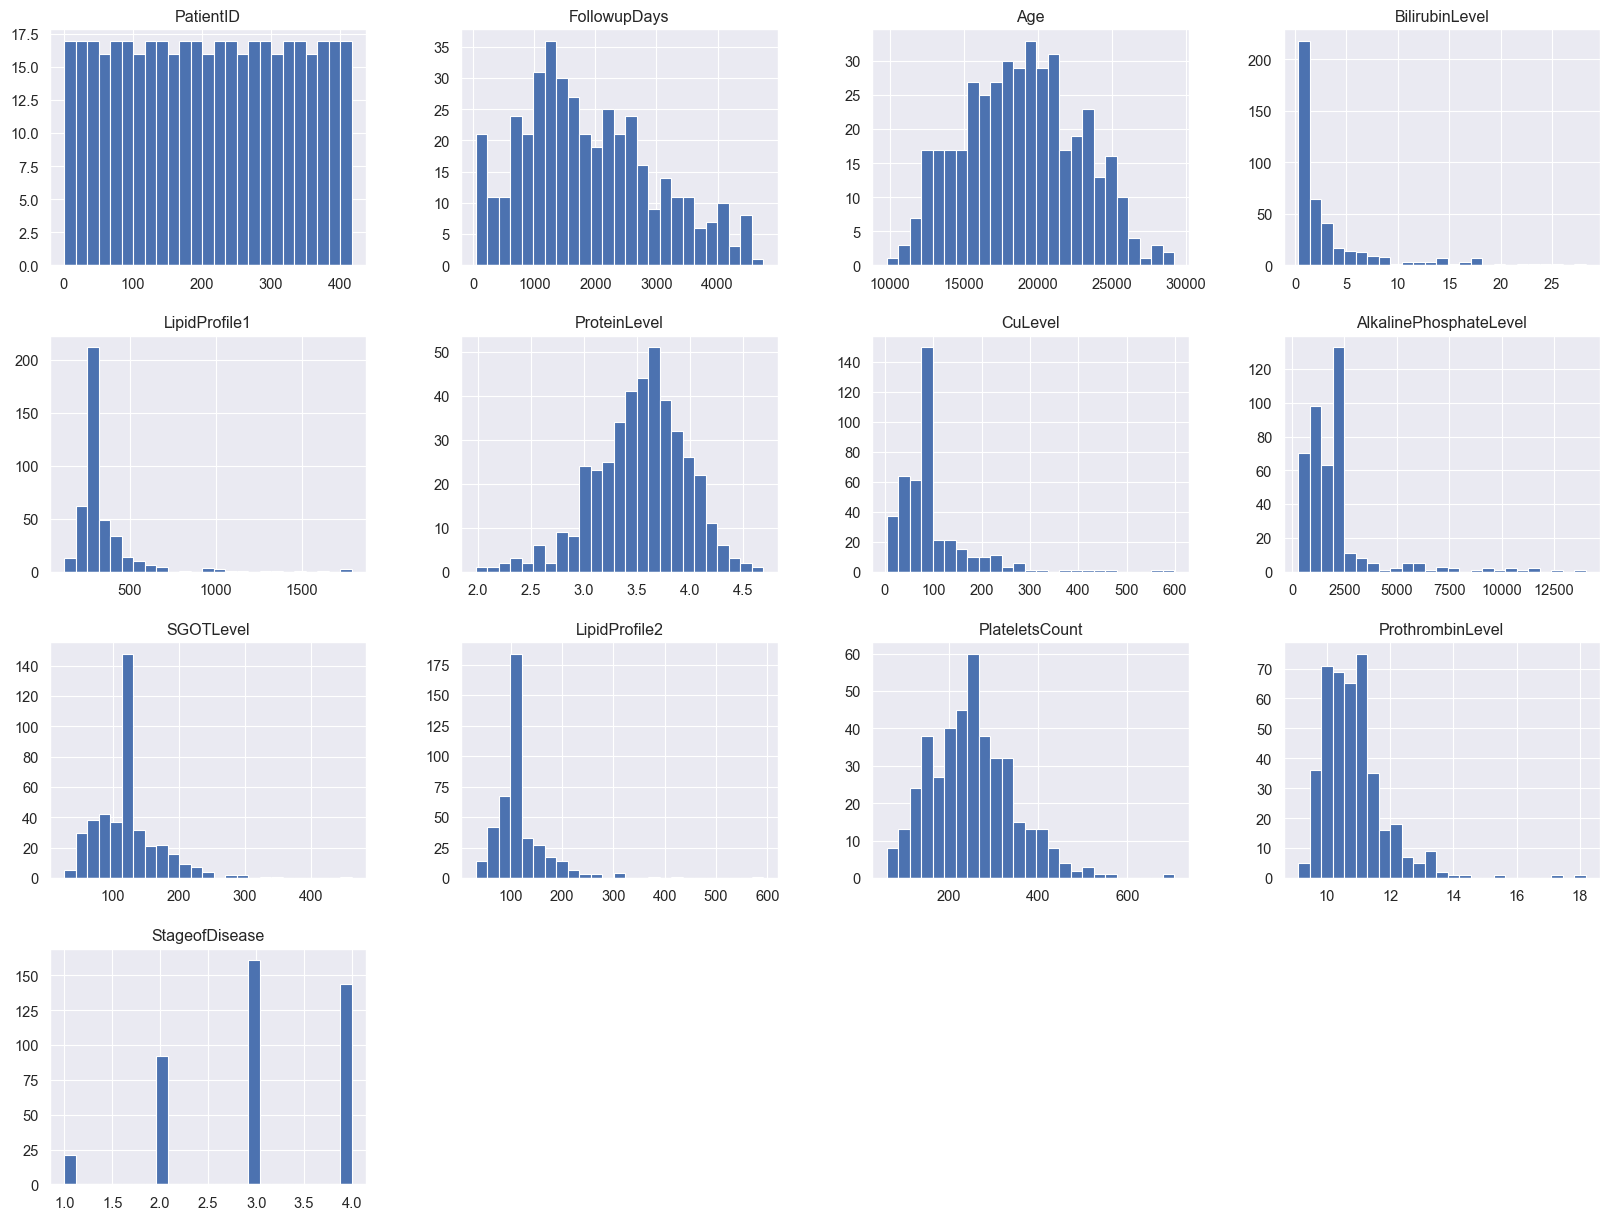

In [27]:
df.hist(bins=25, figsize=(20,15))

plt.show()

From the above graph we can see that Age and proteinlevel are approximately normally distributed, and all other are slight skewed

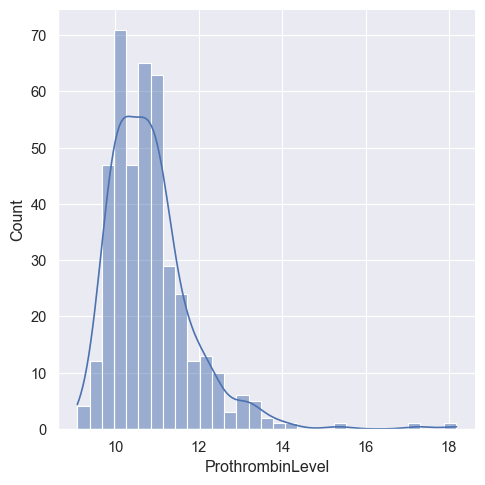

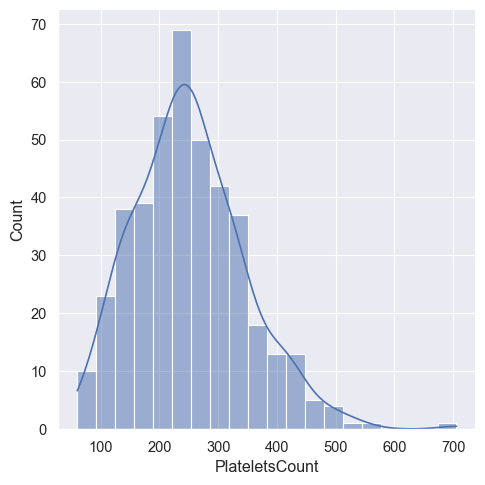

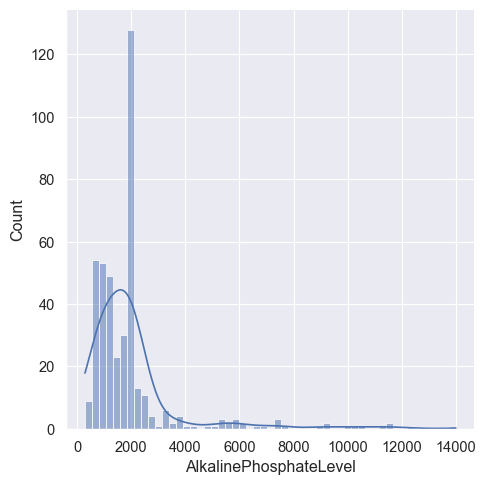

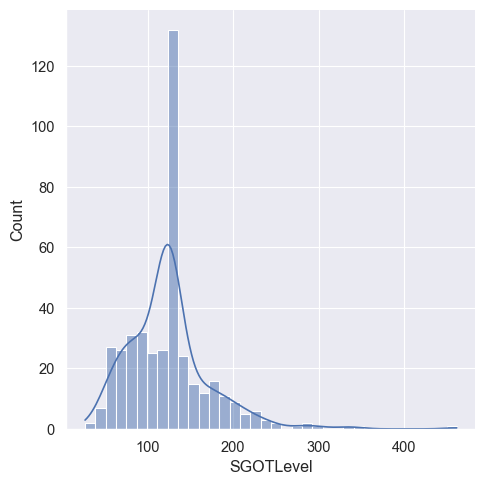

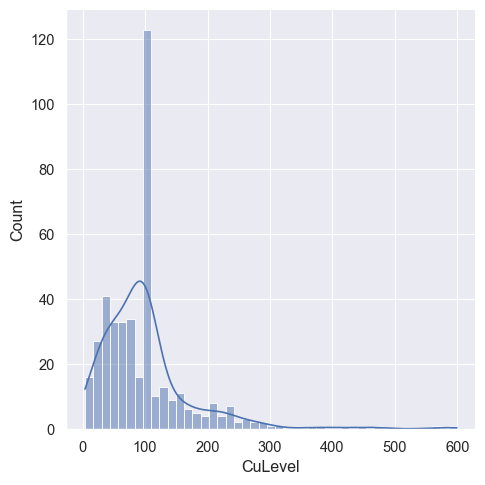

In [28]:
#To understand it in more proper way
for col in df[feature_list1]:
    sns.displot(data=df, x=df[col], kde=True)
    

Almost all these can be considered as rightly skewed

In [29]:
#To understand Target variable 
df['FinalStatus'].value_counts()

censored                      232
death                         161
censored due to transplant     25
Name: FinalStatus, dtype: int64

([<matplotlib.patches.Wedge at 0x2439f188310>,
 [Text(-0.1892034017154784, 1.083606050545719, 'censored'),
  Text(-0.01653422777153482, -1.0998757290312389, 'death'),
  Text(1.080639674114813, -0.20546993631436927, 'censored due to transplant')],
 [Text(-0.10320185548117002, 0.5910578457522103, '55.50%'),
  Text(-0.009018669693564445, -0.5999322158352212, '38.52%'),
  Text(0.5894398222444434, -0.11207451071692869, '5.98%')])

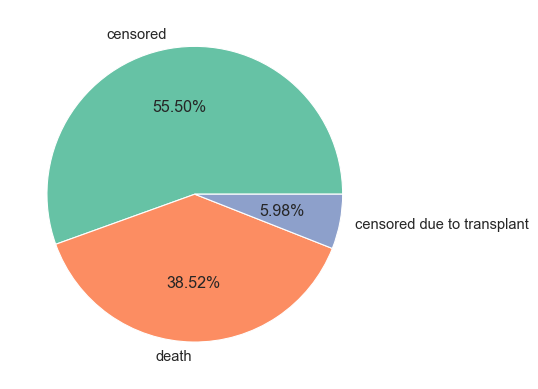

In [30]:
plt.pie(df['FinalStatus'].value_counts(),labels=df['FinalStatus'].value_counts().index,autopct='%1.2f%%', colors=sns.color_palette('Set2'))

More than 50% data is sensored

In [31]:
df['PlateletsCount'].min(),df['PlateletsCount'].max()

(60.0, 706.0)

In [32]:
# def probability_plot(feature):
#     print(f'{feature}')
#     plt.figure(figsize=(12,4))
#     plt.subplot(1,2,1)  #1st plot
#     plt.title(feature)
#     df[feature].hist()
#     plt.subplot(1,2,2)  #2nd plot
#     stats.probplot(df[feature], dist='norm', plot=pylab)
#     plt.tight_layout
#     plt.show()#to check again

In [33]:
# probability_plot('Age')

##### To check the correlation between features

In [34]:
def corr_heatmap(dataset, titles=''): 
    plt.figure(figsize = (10,7))
    sns.set_theme(context='paper', style='dark')
    plt.title(titles)
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(dataset.corr(),annot=True,cmap=cmap)

C:\Users\HP\AppData\Local\Temp\ipykernel_16716\3763327250.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_heatmap(df.iloc[:,1:].corr(),'Correlation of Features')


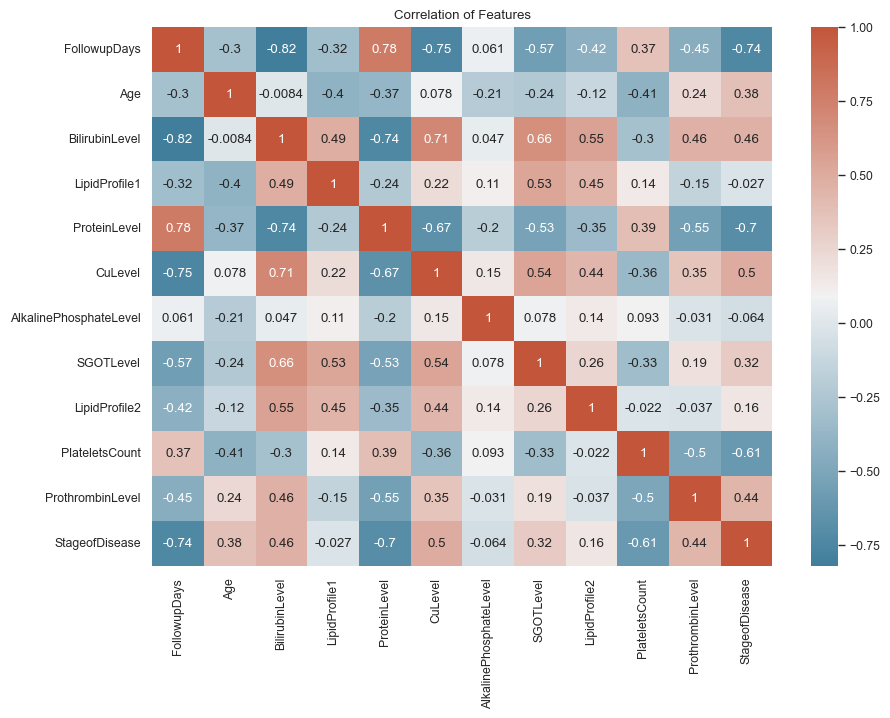

In [35]:
corr_heatmap(df.iloc[:,1:].corr(),'Correlation of Features')

In [36]:
#skewness and kurtosis
df.skew()

C:\Users\HP\AppData\Local\Temp\ipykernel_16716\3455473123.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


PatientID                 0.000000
FollowupDays              0.472621
Age                       0.086858
BilirubinLevel            2.718184
LipidProfile1             4.290097
ProteinLevel             -0.468070
CuLevel                   2.670717
AlkalinePhosphateLevel    3.459876
SGOTLevel                 1.675333
LipidProfile2             3.276764
PlateletsCount            0.635527
ProthrombinLevel          2.229258
StageofDisease           -0.498641
dtype: float64

In [37]:
df.kurtosis()

C:\Users\HP\AppData\Local\Temp\ipykernel_16716\615572439.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


PatientID                 -1.200000
FollowupDays              -0.482125
Age                       -0.616716
BilirubinLevel             8.068355
LipidProfile1             23.011670
ProteinLevel               0.553278
CuLevel                   11.274644
AlkalinePhosphateLevel    13.912545
SGOTLevel                  6.773280
LipidProfile2             19.276317
PlateletsCount             0.965604
ProthrombinLevel          10.108147
StageofDisease            -0.604600
dtype: float64

#### b. Outlier detection using Graphs

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'PatientID'),
  Text(1, 0, 'FollowupDays'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'BilirubinLevel'),
  Text(4, 0, 'LipidProfile1'),
  Text(5, 0, 'ProteinLevel'),
  Text(6, 0, 'CuLevel'),
  Text(7, 0, 'AlkalinePhosphateLevel'),
  Text(8, 0, 'SGOTLevel'),
  Text(9, 0, 'LipidProfile2'),
  Text(10, 0, 'PlateletsCount'),
  Text(11, 0, 'ProthrombinLevel'),
  Text(12, 0, 'StageofDisease')])

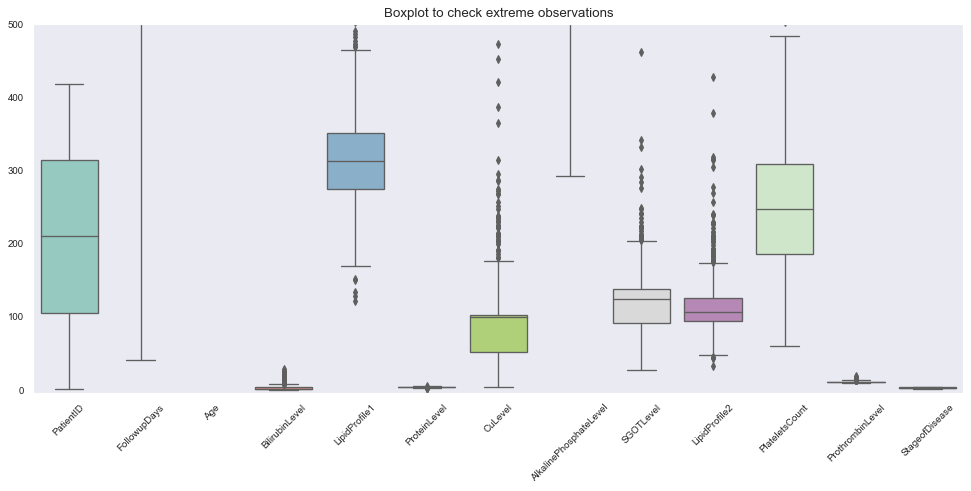

In [38]:
plt.figure(figsize=(15,6),dpi=80)  
plt.title("Boxplot to check extreme observations", fontsize=12)
sns.boxplot(data = df, palette="Set3")
plt.ylim(-5, 500)
plt.xticks(rotation=45)

From the above graph we can see that CuLevel, SGOTlevel,LipidProfile1,LipidProfile2 have extreme observations present hence there are chnaces of outeliers present in these features

#### To deal with these outliers we use IQR method

In [39]:
numeric_columns= df.select_dtypes(include="number")
numeric_columns
    

,PatientID,FollowupDays,Age,BilirubinLevel,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,PlateletsCount,ProthrombinLevel,StageofDisease
0,1,1990,23843,1.11,312.5,3.73,99.13871,2002.482308,123.781923,106.0,136.000000,10.61,3.0
1,2,4747,12667,1.82,312.5,3.27,99.13871,2002.482308,123.781923,106.0,251.398034,18.18,2.0
2,3,1565,24961,0.71,312.5,3.09,99.13871,2002.482308,123.781923,106.0,161.000000,10.10,4.0
3,4,3249,19958,2.32,262.0,3.21,235.00000,11433.400000,106.840000,93.0,211.000000,12.52,3.0
4,5,138,25846,2.42,169.0,2.59,229.00000,1066.560000,122.110000,74.0,105.000000,14.24,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,4142,12105,0.51,323.0,3.58,52.00000,1255.430000,123.670000,79.0,220.000000,10.10,3.0
414,415,3354,23292,0.61,214.0,4.07,10.00000,654.480000,72.010000,76.0,309.000000,17.27,1.0
415,416,1553,18803,1.01,324.0,3.54,95.00000,964.550000,112.110000,175.0,283.000000,9.80,3.0
416,417,2826,20118,1.41,312.5,3.86,99.13871,2002.482308,123.781923,106.0,244.000000,10.40,2.0


In [40]:
def outlier_handle(df,columns):
        for col in columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
#             df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
            df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
            return df

In [41]:
feature_list2

['LipidProfile1', 'LipidProfile2']

In [42]:
feature_list1

['ProthrombinLevel',
 'PlateletsCount',
 'AlkalinePhosphateLevel',
 'SGOTLevel',
 'CuLevel']

In [43]:
columns_to_check = ['LipidProfile1', 'LipidProfile2','ProthrombinLevel',
 'PlateletsCount',
 'AlkalinePhosphateLevel',
 'SGOTLevel',
 'CuLevel']

In [44]:
df_new = outlier_handle(df,columns_to_check)
df_new

,PatientID,FollowupDays,FinalStatus,Medication,Age,Gender,AscitesStatus,LiverSize,SpiderAngiomas,FluidAccumulationSwelling,...,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,PlateletsCount,ProthrombinLevel,StageofDisease,DiureticTherapy
0,1,1990,death,Drug_A,23843,F,no fluid buildup,enlarged,normal,absent,...,312.5,3.73,99.13871,2002.482308,123.781923,106.0,136.000000,10.61,3.0,no
1,2,4747,censored,Drug_A,12667,F,no fluid buildup,enlarged,normal,absent,...,312.5,3.27,99.13871,2002.482308,123.781923,106.0,251.398034,18.18,2.0,no
2,3,1565,censored,Drug_A,24961,F,no fluid buildup,enlarged,normal,absent,...,312.5,3.09,99.13871,2002.482308,123.781923,106.0,161.000000,10.10,4.0,no
3,4,3249,death,Drug_A,19958,F,no fluid buildup,enlarged,normal,present or resolved,...,262.0,3.21,235.00000,11433.400000,106.840000,93.0,211.000000,12.52,3.0,not required or resolved
4,5,138,death,Drug_A,25846,M,no fluid buildup,normal,spider angiomas present,present,...,169.0,2.59,229.00000,1066.560000,122.110000,74.0,105.000000,14.24,3.0,done
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,4142,censored,Drug_B,12105,F,no fluid buildup,normal,normal,absent,...,323.0,3.58,52.00000,1255.430000,123.670000,79.0,220.000000,10.10,3.0,no
414,415,3354,censored,Drug_B,23292,F,no fluid buildup,normal,normal,absent,...,214.0,4.07,10.00000,654.480000,72.010000,76.0,309.000000,17.27,1.0,no
415,416,1553,censored,Drug_B,18803,F,no fluid buildup,enlarged,normal,absent,...,324.0,3.54,95.00000,964.550000,112.110000,175.0,283.000000,9.80,3.0,no
416,417,2826,censored,Drug_A,20118,F,no fluid buildup,enlarged,normal,absent,...,312.5,3.86,99.13871,2002.482308,123.781923,106.0,244.000000,10.40,2.0,no


In [45]:
df_new.reset_index(drop=True,inplace=True)
df_new.head()

,PatientID,FollowupDays,FinalStatus,Medication,Age,Gender,AscitesStatus,LiverSize,SpiderAngiomas,FluidAccumulationSwelling,...,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,PlateletsCount,ProthrombinLevel,StageofDisease,DiureticTherapy
0,1,1990,death,Drug_A,23843,F,no fluid buildup,enlarged,normal,absent,...,312.5,3.73,99.13871,2002.482308,123.781923,106.0,136.000000,10.61,3.0,no
1,2,4747,censored,Drug_A,12667,F,no fluid buildup,enlarged,normal,absent,...,312.5,3.27,99.13871,2002.482308,123.781923,106.0,251.398034,18.18,2.0,no
2,3,1565,censored,Drug_A,24961,F,no fluid buildup,enlarged,normal,absent,...,312.5,3.09,99.13871,2002.482308,123.781923,106.0,161.000000,10.10,4.0,no
3,4,3249,death,Drug_A,19958,F,no fluid buildup,enlarged,normal,present or resolved,...,262.0,3.21,235.00000,11433.400000,106.840000,93.0,211.000000,12.52,3.0,not required or resolved
4,5,138,death,Drug_A,25846,M,no fluid buildup,normal,spider angiomas present,present,...,169.0,2.59,229.00000,1066.560000,122.110000,74.0,105.000000,14.24,3.0,done


In [46]:
df_new.shape

(418, 21)

tried removing the outliers but data size reduced from 418 to 369 to avoid this data loss, cap the values.

In [47]:
# Check the resulting DataFrame
df_new.describe()

,PatientID,FollowupDays,Age,BilirubinLevel,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,PlateletsCount,ProthrombinLevel,StageofDisease
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,209.500000,1898.138756,18903.531100,3.253541,320.993720,3.532727,99.138710,2002.482308,123.781923,117.461722,251.398034,10.839856,3.023923
std,120.810458,1093.633738,3892.163123,4.451154,75.899109,0.429669,75.181428,1866.922182,49.455369,53.509628,95.085138,1.029402,0.875678
min,1.000000,40.000000,9789.000000,0.300000,161.375000,1.980000,4.000000,291.890000,26.610000,32.000000,60.000000,9.090000,1.000000
25%,105.250000,1081.750000,15956.750000,0.810000,275.000000,3.272500,52.250000,1026.412500,91.910000,94.000000,186.000000,10.100000,2.000000
50%,209.500000,1712.000000,19000.000000,1.410000,312.500000,3.570000,99.138710,1734.170000,123.781923,106.000000,247.000000,10.710000,3.000000
75%,313.750000,2586.500000,21697.250000,3.430000,350.750000,3.810000,102.750000,2002.482308,137.107500,125.750000,308.500000,11.210000,4.000000
max,418.000000,4747.000000,29223.000000,28.280000,464.375000,4.690000,599.000000,14001.020000,461.820000,592.000000,706.000000,18.180000,4.000000


## 2. Data Pre-processing

###### a. Remove duplicates if any

In [48]:
df_new.duplicated().sum()

0

In [49]:
#there are no duplicate values present

###### b. fix null values problem

This has already been done above where we imputed values with mean,mode,and median

<Axes: xlabel='FinalStatus', ylabel='count'>

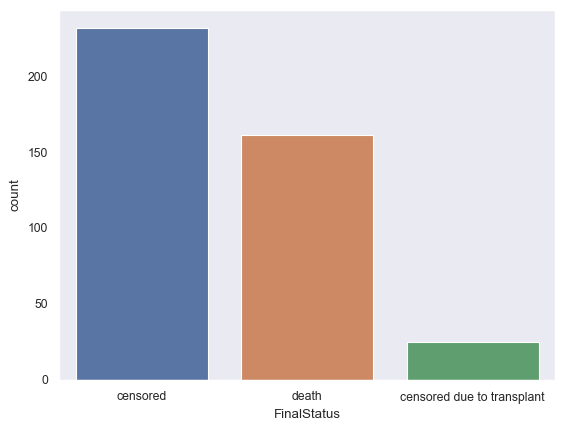

In [50]:
sns.countplot(data=df_new, x="FinalStatus", order=df['FinalStatus'].value_counts().index)

In [51]:
df_new['FinalStatus'].value_counts()

censored                      232
death                         161
censored due to transplant     25
Name: FinalStatus, dtype: int64

There is class imbalance present in the data

we can use SMOTE, randomOversampler etc.

In [52]:
df_new.head(2)

,PatientID,FollowupDays,FinalStatus,Medication,Age,Gender,AscitesStatus,LiverSize,SpiderAngiomas,FluidAccumulationSwelling,...,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,PlateletsCount,ProthrombinLevel,StageofDisease,DiureticTherapy
0,1,1990,death,Drug_A,23843,F,no fluid buildup,enlarged,normal,absent,...,312.5,3.73,99.13871,2002.482308,123.781923,106.0,136.000000,10.61,3.0,no
1,2,4747,censored,Drug_A,12667,F,no fluid buildup,enlarged,normal,absent,...,312.5,3.27,99.13871,2002.482308,123.781923,106.0,251.398034,18.18,2.0,no


In [53]:
#To remove class imbalance define X,y 
X = df_new.drop('FinalStatus', axis=1)
y = df_new['FinalStatus']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['FinalStatus'])], axis=1)

print(df_resampled['FinalStatus'].value_counts())
df_resampled

death                         232
censored                      232
censored due to transplant    232
Name: FinalStatus, dtype: int64


,PatientID,FollowupDays,Medication,Age,Gender,AscitesStatus,LiverSize,SpiderAngiomas,FluidAccumulationSwelling,BilirubinLevel,...,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,PlateletsCount,ProthrombinLevel,StageofDisease,DiureticTherapy,FinalStatus
0,1,1990,Drug_A,23843,F,no fluid buildup,enlarged,normal,absent,1.11,...,3.73,99.13871,2002.482308,123.781923,106.0,136.000000,10.61,3.0,no,death
1,2,4747,Drug_A,12667,F,no fluid buildup,enlarged,normal,absent,1.82,...,3.27,99.13871,2002.482308,123.781923,106.0,251.398034,18.18,2.0,no,censored
2,3,1565,Drug_A,24961,F,no fluid buildup,enlarged,normal,absent,0.71,...,3.09,99.13871,2002.482308,123.781923,106.0,161.000000,10.10,4.0,no,censored
3,4,3249,Drug_A,19958,F,no fluid buildup,enlarged,normal,present or resolved,2.32,...,3.21,235.00000,11433.400000,106.840000,93.0,211.000000,12.52,3.0,not required or resolved,death
4,5,138,Drug_A,25846,M,no fluid buildup,normal,spider angiomas present,present,2.42,...,2.59,229.00000,1066.560000,122.110000,74.0,105.000000,14.24,3.0,done,death
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,377,1673,Drug_A,16701,F,no fluid buildup,normal,spider angiomas present,absent,3.94,...,3.25,123.00000,1280.680000,275.530000,228.0,264.000000,9.70,3.0,no,death
692,113,789,Drug_B,21150,F,no fluid buildup,normal,normal,absent,10.91,...,3.22,272.00000,2205.840000,162.810000,155.0,374.000000,10.50,4.0,no,death
693,346,184,Drug_B,21912,F,no fluid buildup,enlarged,spider angiomas present,absent,3.23,...,3.22,92.00000,823.150000,128.370000,99.0,156.000000,12.12,4.0,no,death
694,378,1346,Drug_A,24500,M,no fluid buildup,normal,normal,absent,1.82,...,3.98,123.00000,10266.650000,80.780000,216.0,208.000000,11.11,3.0,no,death


In [54]:
df_resampled.shape

(696, 21)

Here we used Randomoversampler, to avoid noise and incorrect real time patient data we did not use SMOTE.

## 3. Statistical Analysis 

##### a.Conduct a t-test to compare the mean ‘Bilirubin’ levels between patients with and without ‘Ascites’. What do the results indicate?

In [55]:
df_resampled['AscitesStatus'].value_counts()

no fluid buildup         666
accumulation of fluid     30
Name: AscitesStatus, dtype: int64

In [56]:
df1 = df_resampled.copy() #resampled dataframe df1

In [57]:
df['AscitesStatus'].value_counts()

no fluid buildup         394
accumulation of fluid     24
Name: AscitesStatus, dtype: int64

In [58]:

bilirubin_with_ascites = df1[df1['AscitesStatus'] == 'accumulation of fluid' ]['BilirubinLevel']
bilirubin_without_ascites = df1[df1['AscitesStatus'] == 'no fluid buildup' ]['BilirubinLevel']

In [59]:
bilirubin_with_ascites

10     12.73
34     14.24
35      2.52
50     14.64
73     17.57
90     17.57
113     6.67
116    21.82
142    18.08
146    17.27
156     7.17
213     1.21
218     4.54
258     1.31
306     1.31
309     6.46
312    17.37
348    24.75
351     2.12
352     1.31
359     1.41
365     0.81
389     7.17
417     2.52
625    17.57
629     1.31
650     6.46
652     1.41
666     2.52
668    17.57
Name: BilirubinLevel, dtype: float64

In [60]:
bilirubin_without_ascites

0       1.11
1       1.82
2       0.71
3       2.32
4       2.42
       ...  
691     3.94
692    10.91
693     3.23
694     1.82
695     0.81
Name: BilirubinLevel, Length: 666, dtype: float64

In [61]:
tstat, p_value = stats.ttest_ind(bilirubin_with_ascites, bilirubin_without_ascites)

C:\Users\HP\AppData\Local\Temp\ipykernel_16716\1141735340.py:1: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  tstat, p_value = stats.ttest_ind(bilirubin_with_ascites, bilirubin_without_ascites)


In [62]:
print(f"T-statistic: {tstat}")
print(f"P-value: {p_value}")

alpha = 0.05  # significance level
if p_value < alpha:
    print("The difference in mean Bilirubin levels between patients with and without Ascites is statistically significant.")
else:
    print("There is no significant difference in mean Bilirubin levels between patients with and without Ascites.")

T-statistic: 7.381727255418734
P-value: 4.483726449532187e-13
The difference in mean Bilirubin levels between patients with and without Ascites is statistically significant.


b.Conduct an ANOVA test to determine if there are significant differences in ‘Prothrombin’ levels among different ‘Stages’ of the disease, explain your analysis.

In [63]:
df1['StageofDisease'].unique()

array([3., 2., 4., 1.])

In [64]:
df1

,PatientID,FollowupDays,Medication,Age,Gender,AscitesStatus,LiverSize,SpiderAngiomas,FluidAccumulationSwelling,BilirubinLevel,...,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,PlateletsCount,ProthrombinLevel,StageofDisease,DiureticTherapy,FinalStatus
0,1,1990,Drug_A,23843,F,no fluid buildup,enlarged,normal,absent,1.11,...,3.73,99.13871,2002.482308,123.781923,106.0,136.000000,10.61,3.0,no,death
1,2,4747,Drug_A,12667,F,no fluid buildup,enlarged,normal,absent,1.82,...,3.27,99.13871,2002.482308,123.781923,106.0,251.398034,18.18,2.0,no,censored
2,3,1565,Drug_A,24961,F,no fluid buildup,enlarged,normal,absent,0.71,...,3.09,99.13871,2002.482308,123.781923,106.0,161.000000,10.10,4.0,no,censored
3,4,3249,Drug_A,19958,F,no fluid buildup,enlarged,normal,present or resolved,2.32,...,3.21,235.00000,11433.400000,106.840000,93.0,211.000000,12.52,3.0,not required or resolved,death
4,5,138,Drug_A,25846,M,no fluid buildup,normal,spider angiomas present,present,2.42,...,2.59,229.00000,1066.560000,122.110000,74.0,105.000000,14.24,3.0,done,death
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,377,1673,Drug_A,16701,F,no fluid buildup,normal,spider angiomas present,absent,3.94,...,3.25,123.00000,1280.680000,275.530000,228.0,264.000000,9.70,3.0,no,death
692,113,789,Drug_B,21150,F,no fluid buildup,normal,normal,absent,10.91,...,3.22,272.00000,2205.840000,162.810000,155.0,374.000000,10.50,4.0,no,death
693,346,184,Drug_B,21912,F,no fluid buildup,enlarged,spider angiomas present,absent,3.23,...,3.22,92.00000,823.150000,128.370000,99.0,156.000000,12.12,4.0,no,death
694,378,1346,Drug_A,24500,M,no fluid buildup,normal,normal,absent,1.82,...,3.98,123.00000,10266.650000,80.780000,216.0,208.000000,11.11,3.0,no,death


In [65]:
#to encode the data using one hot encoding
df1.select_dtypes(include="object")

,Medication,Gender,AscitesStatus,LiverSize,SpiderAngiomas,FluidAccumulationSwelling,DiureticTherapy,FinalStatus
0,Drug_A,F,no fluid buildup,enlarged,normal,absent,no,death
1,Drug_A,F,no fluid buildup,enlarged,normal,absent,no,censored
2,Drug_A,F,no fluid buildup,enlarged,normal,absent,no,censored
3,Drug_A,F,no fluid buildup,enlarged,normal,present or resolved,not required or resolved,death
4,Drug_A,M,no fluid buildup,normal,spider angiomas present,present,done,death
...,...,...,...,...,...,...,...,...
691,Drug_A,F,no fluid buildup,normal,spider angiomas present,absent,no,death
692,Drug_B,F,no fluid buildup,normal,normal,absent,no,death
693,Drug_B,F,no fluid buildup,enlarged,spider angiomas present,absent,no,death
694,Drug_A,M,no fluid buildup,normal,normal,absent,no,death


In [66]:
encoded_df = pd.get_dummies(df1, columns=['Medication', 'Gender', 'AscitesStatus', 'LiverSize', 'SpiderAngiomas', 'FluidAccumulationSwelling', 'DiureticTherapy'])


In [67]:
encoded_df

,PatientID,FollowupDays,Age,BilirubinLevel,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,...,LiverSize_enlarged,LiverSize_normal,SpiderAngiomas_normal,SpiderAngiomas_spider angiomas present,FluidAccumulationSwelling_absent,FluidAccumulationSwelling_present,FluidAccumulationSwelling_present or resolved,DiureticTherapy_done,DiureticTherapy_no,DiureticTherapy_not required or resolved
0,1,1990,23843,1.11,312.500,3.73,99.13871,2002.482308,123.781923,106.0,...,1,0,1,0,1,0,0,0,1,0
1,2,4747,12667,1.82,312.500,3.27,99.13871,2002.482308,123.781923,106.0,...,1,0,1,0,1,0,0,0,1,0
2,3,1565,24961,0.71,312.500,3.09,99.13871,2002.482308,123.781923,106.0,...,1,0,1,0,1,0,0,0,1,0
3,4,3249,19958,2.32,262.000,3.21,235.00000,11433.400000,106.840000,93.0,...,1,0,1,0,0,0,1,0,0,1
4,5,138,25846,2.42,169.000,2.59,229.00000,1066.560000,122.110000,74.0,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,377,1673,16701,3.94,353.000,3.25,123.00000,1280.680000,275.530000,228.0,...,0,1,0,1,1,0,0,0,1,0
692,113,789,21150,10.91,464.375,3.22,272.00000,2205.840000,162.810000,155.0,...,0,1,1,0,1,0,0,0,1,0
693,346,184,21912,3.23,262.000,3.22,92.00000,823.150000,128.370000,99.0,...,1,0,0,1,1,0,0,0,1,0
694,378,1346,24500,1.82,420.000,3.98,123.00000,10266.650000,80.780000,216.0,...,0,1,1,0,1,0,0,0,1,0


In [68]:
df1 = df1.drop(columns=['Medication', 'Gender', 'AscitesStatus', 'LiverSize', 'SpiderAngiomas', 'FluidAccumulationSwelling', 'DiureticTherapy']) #to remove originalcolumns and add encoded columns

In [69]:
df1.head()#14 columns


,PatientID,FollowupDays,Age,BilirubinLevel,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,PlateletsCount,ProthrombinLevel,StageofDisease,FinalStatus
0,1,1990,23843,1.11,312.5,3.73,99.13871,2002.482308,123.781923,106.0,136.000000,10.61,3.0,death
1,2,4747,12667,1.82,312.5,3.27,99.13871,2002.482308,123.781923,106.0,251.398034,18.18,2.0,censored
2,3,1565,24961,0.71,312.5,3.09,99.13871,2002.482308,123.781923,106.0,161.000000,10.10,4.0,censored
3,4,3249,19958,2.32,262.0,3.21,235.00000,11433.400000,106.840000,93.0,211.000000,12.52,3.0,death
4,5,138,25846,2.42,169.0,2.59,229.00000,1066.560000,122.110000,74.0,105.000000,14.24,3.0,death


In [70]:
encoded_df.isna().sum()

PatientID                                        0
FollowupDays                                     0
Age                                              0
BilirubinLevel                                   0
LipidProfile1                                    0
ProteinLevel                                     0
CuLevel                                          0
AlkalinePhosphateLevel                           0
SGOTLevel                                        0
LipidProfile2                                    0
PlateletsCount                                   0
ProthrombinLevel                                 0
StageofDisease                                   0
FinalStatus                                      0
Medication_Drug_A                                0
Medication_Drug_B                                0
Gender_F                                         0
Gender_M                                         0
AscitesStatus_accumulation of fluid              0
AscitesStatus_no fluid buildup 

In [71]:
df1.shape

(696, 14)

In [72]:
df1.columns

Index(['PatientID', 'FollowupDays', 'Age', 'BilirubinLevel', 'LipidProfile1',
       'ProteinLevel', 'CuLevel', 'AlkalinePhosphateLevel', 'SGOTLevel',
       'LipidProfile2', 'PlateletsCount', 'ProthrombinLevel', 'StageofDisease',
       'FinalStatus'],
      dtype='object')

In [73]:
encoded_df.columns

Index(['PatientID', 'FollowupDays', 'Age', 'BilirubinLevel', 'LipidProfile1',
       'ProteinLevel', 'CuLevel', 'AlkalinePhosphateLevel', 'SGOTLevel',
       'LipidProfile2', 'PlateletsCount', 'ProthrombinLevel', 'StageofDisease',
       'FinalStatus', 'Medication_Drug_A', 'Medication_Drug_B', 'Gender_F',
       'Gender_M', 'AscitesStatus_accumulation of fluid',
       'AscitesStatus_no fluid buildup', 'LiverSize_enlarged',
       'LiverSize_normal', 'SpiderAngiomas_normal',
       'SpiderAngiomas_spider angiomas present',
       'FluidAccumulationSwelling_absent', 'FluidAccumulationSwelling_present',
       'FluidAccumulationSwelling_present or resolved', 'DiureticTherapy_done',
       'DiureticTherapy_no', 'DiureticTherapy_not required or resolved'],
      dtype='object')

In [74]:
df_combine = pd.concat([df1,encoded_df.iloc[:,14:]],axis=1)
df_combine

,PatientID,FollowupDays,Age,BilirubinLevel,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,...,LiverSize_enlarged,LiverSize_normal,SpiderAngiomas_normal,SpiderAngiomas_spider angiomas present,FluidAccumulationSwelling_absent,FluidAccumulationSwelling_present,FluidAccumulationSwelling_present or resolved,DiureticTherapy_done,DiureticTherapy_no,DiureticTherapy_not required or resolved
0,1,1990,23843,1.11,312.500,3.73,99.13871,2002.482308,123.781923,106.0,...,1,0,1,0,1,0,0,0,1,0
1,2,4747,12667,1.82,312.500,3.27,99.13871,2002.482308,123.781923,106.0,...,1,0,1,0,1,0,0,0,1,0
2,3,1565,24961,0.71,312.500,3.09,99.13871,2002.482308,123.781923,106.0,...,1,0,1,0,1,0,0,0,1,0
3,4,3249,19958,2.32,262.000,3.21,235.00000,11433.400000,106.840000,93.0,...,1,0,1,0,0,0,1,0,0,1
4,5,138,25846,2.42,169.000,2.59,229.00000,1066.560000,122.110000,74.0,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,377,1673,16701,3.94,353.000,3.25,123.00000,1280.680000,275.530000,228.0,...,0,1,0,1,1,0,0,0,1,0
692,113,789,21150,10.91,464.375,3.22,272.00000,2205.840000,162.810000,155.0,...,0,1,1,0,1,0,0,0,1,0
693,346,184,21912,3.23,262.000,3.22,92.00000,823.150000,128.370000,99.0,...,1,0,0,1,1,0,0,0,1,0
694,378,1346,24500,1.82,420.000,3.98,123.00000,10266.650000,80.780000,216.0,...,0,1,1,0,1,0,0,0,1,0


In [75]:
y = df_combine['FinalStatus']
df_combine.drop(['FinalStatus'],axis=1,inplace=True)

df_combine.head()

,PatientID,FollowupDays,Age,BilirubinLevel,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,...,LiverSize_enlarged,LiverSize_normal,SpiderAngiomas_normal,SpiderAngiomas_spider angiomas present,FluidAccumulationSwelling_absent,FluidAccumulationSwelling_present,FluidAccumulationSwelling_present or resolved,DiureticTherapy_done,DiureticTherapy_no,DiureticTherapy_not required or resolved
0,1,1990,23843,1.11,312.5,3.73,99.13871,2002.482308,123.781923,106.0,...,1,0,1,0,1,0,0,0,1,0
1,2,4747,12667,1.82,312.5,3.27,99.13871,2002.482308,123.781923,106.0,...,1,0,1,0,1,0,0,0,1,0
2,3,1565,24961,0.71,312.5,3.09,99.13871,2002.482308,123.781923,106.0,...,1,0,1,0,1,0,0,0,1,0
3,4,3249,19958,2.32,262.0,3.21,235.00000,11433.400000,106.840000,93.0,...,1,0,1,0,0,0,1,0,0,1
4,5,138,25846,2.42,169.0,2.59,229.00000,1066.560000,122.110000,74.0,...,0,1,0,1,0,1,0,1,0,0


In [76]:
df_combine.insert(29,'FinalStatus',y)


In [77]:
df_combine

,PatientID,FollowupDays,Age,BilirubinLevel,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,...,LiverSize_normal,SpiderAngiomas_normal,SpiderAngiomas_spider angiomas present,FluidAccumulationSwelling_absent,FluidAccumulationSwelling_present,FluidAccumulationSwelling_present or resolved,DiureticTherapy_done,DiureticTherapy_no,DiureticTherapy_not required or resolved,FinalStatus
0,1,1990,23843,1.11,312.500,3.73,99.13871,2002.482308,123.781923,106.0,...,0,1,0,1,0,0,0,1,0,death
1,2,4747,12667,1.82,312.500,3.27,99.13871,2002.482308,123.781923,106.0,...,0,1,0,1,0,0,0,1,0,censored
2,3,1565,24961,0.71,312.500,3.09,99.13871,2002.482308,123.781923,106.0,...,0,1,0,1,0,0,0,1,0,censored
3,4,3249,19958,2.32,262.000,3.21,235.00000,11433.400000,106.840000,93.0,...,0,1,0,0,0,1,0,0,1,death
4,5,138,25846,2.42,169.000,2.59,229.00000,1066.560000,122.110000,74.0,...,1,0,1,0,1,0,1,0,0,death
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,377,1673,16701,3.94,353.000,3.25,123.00000,1280.680000,275.530000,228.0,...,1,0,1,1,0,0,0,1,0,death
692,113,789,21150,10.91,464.375,3.22,272.00000,2205.840000,162.810000,155.0,...,1,1,0,1,0,0,0,1,0,death
693,346,184,21912,3.23,262.000,3.22,92.00000,823.150000,128.370000,99.0,...,0,0,1,1,0,0,0,1,0,death
694,378,1346,24500,1.82,420.000,3.98,123.00000,10266.650000,80.780000,216.0,...,1,1,0,1,0,0,0,1,0,death


In [78]:
#considering only numeric columns
numeric_columns= df_combine.select_dtypes(include='number')
numeric_columns

,PatientID,FollowupDays,Age,BilirubinLevel,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,...,LiverSize_enlarged,LiverSize_normal,SpiderAngiomas_normal,SpiderAngiomas_spider angiomas present,FluidAccumulationSwelling_absent,FluidAccumulationSwelling_present,FluidAccumulationSwelling_present or resolved,DiureticTherapy_done,DiureticTherapy_no,DiureticTherapy_not required or resolved
0,1,1990,23843,1.11,312.500,3.73,99.13871,2002.482308,123.781923,106.0,...,1,0,1,0,1,0,0,0,1,0
1,2,4747,12667,1.82,312.500,3.27,99.13871,2002.482308,123.781923,106.0,...,1,0,1,0,1,0,0,0,1,0
2,3,1565,24961,0.71,312.500,3.09,99.13871,2002.482308,123.781923,106.0,...,1,0,1,0,1,0,0,0,1,0
3,4,3249,19958,2.32,262.000,3.21,235.00000,11433.400000,106.840000,93.0,...,1,0,1,0,0,0,1,0,0,1
4,5,138,25846,2.42,169.000,2.59,229.00000,1066.560000,122.110000,74.0,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,377,1673,16701,3.94,353.000,3.25,123.00000,1280.680000,275.530000,228.0,...,0,1,0,1,1,0,0,0,1,0
692,113,789,21150,10.91,464.375,3.22,272.00000,2205.840000,162.810000,155.0,...,0,1,1,0,1,0,0,0,1,0
693,346,184,21912,3.23,262.000,3.22,92.00000,823.150000,128.370000,99.0,...,1,0,0,1,1,0,0,0,1,0
694,378,1346,24500,1.82,420.000,3.98,123.00000,10266.650000,80.780000,216.0,...,0,1,1,0,1,0,0,0,1,0


In [79]:
df_num = df_combine[numeric_columns.columns[1:]]
df_num

,FollowupDays,Age,BilirubinLevel,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,PlateletsCount,...,LiverSize_enlarged,LiverSize_normal,SpiderAngiomas_normal,SpiderAngiomas_spider angiomas present,FluidAccumulationSwelling_absent,FluidAccumulationSwelling_present,FluidAccumulationSwelling_present or resolved,DiureticTherapy_done,DiureticTherapy_no,DiureticTherapy_not required or resolved
0,1990,23843,1.11,312.500,3.73,99.13871,2002.482308,123.781923,106.0,136.000000,...,1,0,1,0,1,0,0,0,1,0
1,4747,12667,1.82,312.500,3.27,99.13871,2002.482308,123.781923,106.0,251.398034,...,1,0,1,0,1,0,0,0,1,0
2,1565,24961,0.71,312.500,3.09,99.13871,2002.482308,123.781923,106.0,161.000000,...,1,0,1,0,1,0,0,0,1,0
3,3249,19958,2.32,262.000,3.21,235.00000,11433.400000,106.840000,93.0,211.000000,...,1,0,1,0,0,0,1,0,0,1
4,138,25846,2.42,169.000,2.59,229.00000,1066.560000,122.110000,74.0,105.000000,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,1673,16701,3.94,353.000,3.25,123.00000,1280.680000,275.530000,228.0,264.000000,...,0,1,0,1,1,0,0,0,1,0
692,789,21150,10.91,464.375,3.22,272.00000,2205.840000,162.810000,155.0,374.000000,...,0,1,1,0,1,0,0,0,1,0
693,184,21912,3.23,262.000,3.22,92.00000,823.150000,128.370000,99.0,156.000000,...,1,0,0,1,1,0,0,0,1,0
694,1346,24500,1.82,420.000,3.98,123.00000,10266.650000,80.780000,216.0,208.000000,...,0,1,1,0,1,0,0,0,1,0


In [80]:
df_combine.columns

Index(['PatientID', 'FollowupDays', 'Age', 'BilirubinLevel', 'LipidProfile1',
       'ProteinLevel', 'CuLevel', 'AlkalinePhosphateLevel', 'SGOTLevel',
       'LipidProfile2', 'PlateletsCount', 'ProthrombinLevel', 'StageofDisease',
       'Medication_Drug_A', 'Medication_Drug_B', 'Gender_F', 'Gender_M',
       'AscitesStatus_accumulation of fluid', 'AscitesStatus_no fluid buildup',
       'LiverSize_enlarged', 'LiverSize_normal', 'SpiderAngiomas_normal',
       'SpiderAngiomas_spider angiomas present',
       'FluidAccumulationSwelling_absent', 'FluidAccumulationSwelling_present',
       'FluidAccumulationSwelling_present or resolved', 'DiureticTherapy_done',
       'DiureticTherapy_no', 'DiureticTherapy_not required or resolved',
       'FinalStatus'],
      dtype='object')

In [81]:
df_num['StageofDisease'].value_counts()

3.0    281
4.0    244
2.0    150
1.0     21
Name: StageofDisease, dtype: int64

In [82]:
#To label encode target variable
label_encoder = LabelEncoder()
df_combine['FinalStatus_encoded'] = label_encoder.fit_transform(df_combine['FinalStatus'])
df_combine

,PatientID,FollowupDays,Age,BilirubinLevel,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,...,SpiderAngiomas_normal,SpiderAngiomas_spider angiomas present,FluidAccumulationSwelling_absent,FluidAccumulationSwelling_present,FluidAccumulationSwelling_present or resolved,DiureticTherapy_done,DiureticTherapy_no,DiureticTherapy_not required or resolved,FinalStatus,FinalStatus_encoded
0,1,1990,23843,1.11,312.500,3.73,99.13871,2002.482308,123.781923,106.0,...,1,0,1,0,0,0,1,0,death,2
1,2,4747,12667,1.82,312.500,3.27,99.13871,2002.482308,123.781923,106.0,...,1,0,1,0,0,0,1,0,censored,0
2,3,1565,24961,0.71,312.500,3.09,99.13871,2002.482308,123.781923,106.0,...,1,0,1,0,0,0,1,0,censored,0
3,4,3249,19958,2.32,262.000,3.21,235.00000,11433.400000,106.840000,93.0,...,1,0,0,0,1,0,0,1,death,2
4,5,138,25846,2.42,169.000,2.59,229.00000,1066.560000,122.110000,74.0,...,0,1,0,1,0,1,0,0,death,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,377,1673,16701,3.94,353.000,3.25,123.00000,1280.680000,275.530000,228.0,...,0,1,1,0,0,0,1,0,death,2
692,113,789,21150,10.91,464.375,3.22,272.00000,2205.840000,162.810000,155.0,...,1,0,1,0,0,0,1,0,death,2
693,346,184,21912,3.23,262.000,3.22,92.00000,823.150000,128.370000,99.0,...,0,1,1,0,0,0,1,0,death,2
694,378,1346,24500,1.82,420.000,3.98,123.00000,10266.650000,80.780000,216.0,...,1,0,1,0,0,0,1,0,death,2


In [83]:
oiginal_target = df_combine['FinalStatus']
df_combine.drop(['FinalStatus'],axis=1,inplace=True)
print(df_combine.shape)
df_combine.head()

(696, 30)


,PatientID,FollowupDays,Age,BilirubinLevel,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,...,LiverSize_normal,SpiderAngiomas_normal,SpiderAngiomas_spider angiomas present,FluidAccumulationSwelling_absent,FluidAccumulationSwelling_present,FluidAccumulationSwelling_present or resolved,DiureticTherapy_done,DiureticTherapy_no,DiureticTherapy_not required or resolved,FinalStatus_encoded
0,1,1990,23843,1.11,312.5,3.73,99.13871,2002.482308,123.781923,106.0,...,0,1,0,1,0,0,0,1,0,2
1,2,4747,12667,1.82,312.5,3.27,99.13871,2002.482308,123.781923,106.0,...,0,1,0,1,0,0,0,1,0,0
2,3,1565,24961,0.71,312.5,3.09,99.13871,2002.482308,123.781923,106.0,...,0,1,0,1,0,0,0,1,0,0
3,4,3249,19958,2.32,262.0,3.21,235.00000,11433.400000,106.840000,93.0,...,0,1,0,0,0,1,0,0,1,2
4,5,138,25846,2.42,169.0,2.59,229.00000,1066.560000,122.110000,74.0,...,1,0,1,0,1,0,1,0,0,2


##### b. Conduct an ANOVA test to determine if there are significant differences in ‘Prothrombin’ levels among different ‘Stages’ of the disease, explain your analysis.

In [84]:

df2 = df_combine[['StageofDisease', 'ProthrombinLevel']]

# Group data by StageOfDisease
groups = df2.groupby('StageofDisease')['ProthrombinLevel'].apply(list)

# Perform one-way ANOVA
f_val, p_val = stats.f_oneway(*groups)

print(f'F-Value: {f_val}, P-Value: {p_val}')

F-Value: 13.610249755172905, P-Value: 1.2334794314626765e-08


C:\Users\HP\AppData\Local\Temp\ipykernel_16716\3331141062.py:7: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  f_val, p_val = stats.f_oneway(*groups)


As we can see the P-value is less than alpha =0.05, hence the anova test is statistically significant.

In [85]:
# df_combine.groupby(['ProthrombinLevel']).agg(['count','mean','median','std'])['StageofDisease']

<Axes: xlabel='FollowupDays', ylabel='ProthrombinLevel'>

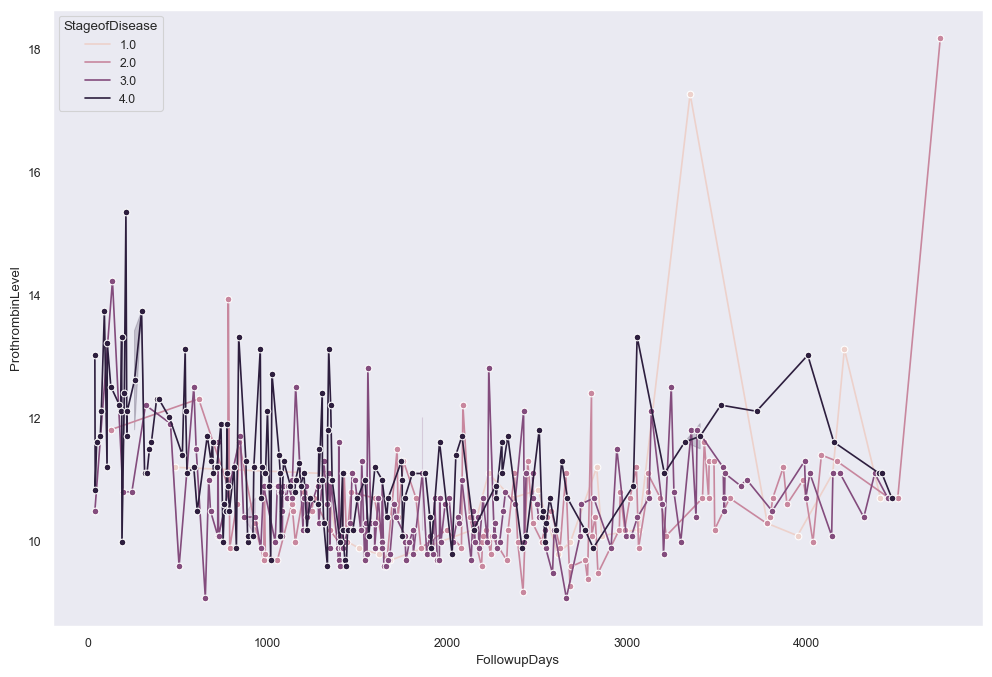

In [86]:
plt.figure(figsize=[12,8])
sns.lineplot(data=df_combine,x='FollowupDays', y='ProthrombinLevel', hue='StageofDisease', marker='o')

If ProthrombinLevel  are more then there are chances of serious liver damage, or clotting time will be higher.
Hence ProthrombinLevel varies significantly with stage of the disease.

##### C.Is there a significant difference in the average age of patients based on medications given?

In [87]:
data = df[['Medication', 'Age']]

groups = data.groupby('Medication')['Age'].apply(list)
f_val, p_val = stats.f_oneway(*groups)

print(f'F-Value: {f_val}, P-Value: {p_val}')

F-Value: 10.654690418539849, P-Value: 0.0011886394466044867


C:\Users\HP\AppData\Local\Temp\ipykernel_16716\3803020605.py:4: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  f_val, p_val = stats.f_oneway(*groups)


Yes there is significant difference in the average age of patients based on medications gievn

#### 5.	Modelling – 

a.	Divide the data for training and testing. 

b.	Train any classifier model on the training dataset and evaluate it on the testing dataset. 

c.	Explain your choice of evaluation metric.

d.	 Provide further steps that can be used to improve model performance.


In [88]:
df_combine.columns

Index(['PatientID', 'FollowupDays', 'Age', 'BilirubinLevel', 'LipidProfile1',
       'ProteinLevel', 'CuLevel', 'AlkalinePhosphateLevel', 'SGOTLevel',
       'LipidProfile2', 'PlateletsCount', 'ProthrombinLevel', 'StageofDisease',
       'Medication_Drug_A', 'Medication_Drug_B', 'Gender_F', 'Gender_M',
       'AscitesStatus_accumulation of fluid', 'AscitesStatus_no fluid buildup',
       'LiverSize_enlarged', 'LiverSize_normal', 'SpiderAngiomas_normal',
       'SpiderAngiomas_spider angiomas present',
       'FluidAccumulationSwelling_absent', 'FluidAccumulationSwelling_present',
       'FluidAccumulationSwelling_present or resolved', 'DiureticTherapy_done',
       'DiureticTherapy_no', 'DiureticTherapy_not required or resolved',
       'FinalStatus_encoded'],
      dtype='object')

In [89]:
df_combine.head(2)

,PatientID,FollowupDays,Age,BilirubinLevel,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,...,LiverSize_normal,SpiderAngiomas_normal,SpiderAngiomas_spider angiomas present,FluidAccumulationSwelling_absent,FluidAccumulationSwelling_present,FluidAccumulationSwelling_present or resolved,DiureticTherapy_done,DiureticTherapy_no,DiureticTherapy_not required or resolved,FinalStatus_encoded
0,1,1990,23843,1.11,312.5,3.73,99.13871,2002.482308,123.781923,106.0,...,0,1,0,1,0,0,0,1,0,2
1,2,4747,12667,1.82,312.5,3.27,99.13871,2002.482308,123.781923,106.0,...,0,1,0,1,0,0,0,1,0,0


In [90]:
y= df_combine['FinalStatus_encoded']
y

0      2
1      0
2      0
3      2
4      2
      ..
691    2
692    2
693    2
694    2
695    2
Name: FinalStatus_encoded, Length: 696, dtype: int32

In [91]:
X = df_combine.drop(columns=['PatientID', 'FinalStatus_encoded'])
X

,FollowupDays,Age,BilirubinLevel,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,PlateletsCount,...,LiverSize_enlarged,LiverSize_normal,SpiderAngiomas_normal,SpiderAngiomas_spider angiomas present,FluidAccumulationSwelling_absent,FluidAccumulationSwelling_present,FluidAccumulationSwelling_present or resolved,DiureticTherapy_done,DiureticTherapy_no,DiureticTherapy_not required or resolved
0,1990,23843,1.11,312.500,3.73,99.13871,2002.482308,123.781923,106.0,136.000000,...,1,0,1,0,1,0,0,0,1,0
1,4747,12667,1.82,312.500,3.27,99.13871,2002.482308,123.781923,106.0,251.398034,...,1,0,1,0,1,0,0,0,1,0
2,1565,24961,0.71,312.500,3.09,99.13871,2002.482308,123.781923,106.0,161.000000,...,1,0,1,0,1,0,0,0,1,0
3,3249,19958,2.32,262.000,3.21,235.00000,11433.400000,106.840000,93.0,211.000000,...,1,0,1,0,0,0,1,0,0,1
4,138,25846,2.42,169.000,2.59,229.00000,1066.560000,122.110000,74.0,105.000000,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,1673,16701,3.94,353.000,3.25,123.00000,1280.680000,275.530000,228.0,264.000000,...,0,1,0,1,1,0,0,0,1,0
692,789,21150,10.91,464.375,3.22,272.00000,2205.840000,162.810000,155.0,374.000000,...,0,1,1,0,1,0,0,0,1,0
693,184,21912,3.23,262.000,3.22,92.00000,823.150000,128.370000,99.0,156.000000,...,1,0,0,1,1,0,0,0,1,0
694,1346,24500,1.82,420.000,3.98,123.00000,10266.650000,80.780000,216.0,208.000000,...,0,1,1,0,1,0,0,0,1,0


In [92]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [93]:
print(X_train.shape)

(487, 28)


In [94]:
print(X_test.shape)

(209, 28)


In [95]:
label_encoder.inverse_transform([0,1,2])

array(['censored', 'censored due to transplant', 'death'], dtype=object)

we have not scaled the data as we are going for RandomForest and DecisionTree and XGBoost, but for pipeline we are considering both

In [96]:
#original peipline
rf_original = RandomForestClassifier(random_state=42)
dt_original = DecisionTreeClassifier(random_state=42)
xgb_original = XGBClassifier(random_state=42)
pipeline_rf_original = Pipeline([
    ('classifier', rf_original)
])
pipeline_dt_original = Pipeline([
    ('classifier', dt_original)
])
pipeline_xgb_original = Pipeline([
    ('classifier', xgb_original)
])


In [97]:
#scaling pipeline
scaler = StandardScaler()
rf_scaled = RandomForestClassifier(random_state=42)
dt_scaled = DecisionTreeClassifier(random_state=42)
xgb_scaled = XGBClassifier(random_state=42)
pipeline_rf_scaled = Pipeline([
    ('scaler', scaler),
    ('classifier', rf_scaled)
])
pipeline_dt_scaled = Pipeline([
    ('scaler', scaler),
    ('classifier', dt_scaled)
])
pipeline_xgb_scaled = Pipeline([
    ('scaler', scaler),
    ('classifier', xgb_scaled)
])


In [98]:
results =[]

def evaluate_model(pipeline, X_train, X_test, y_train, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    return cm, acc, precision, recall




#create pipeline for original and scaled data, as scaling is not really required but this is part of experiement
#for original data
for name, pipeline in {'Random Forest (Original)': pipeline_rf_original,
                       'Decision Tree (Original)': pipeline_dt_original,
                       'XGBoost (Original)': pipeline_xgb_original}.items():
    conf_mat, acc, precision, recall = evaluate_model(pipeline, X_train, X_test, y_train, y_test)
    results.append([name, conf_mat, acc, precision, recall])

#for scaled data
for name, pipeline in {'Random Forest (Scaled)': pipeline_rf_scaled,
                       'Decision Tree (Scaled)': pipeline_dt_scaled,
                       'XGBoost (Scaled)': pipeline_xgb_scaled}.items():
    conf_mat_scale, acc_scale, precision_scale, recall_scale = evaluate_model(pipeline, X_train, X_test, y_train, y_test)
    results.append([name, conf_mat_scale, acc_scale, precision_scale, recall_scale ])


In [99]:
results

[['Random Forest (Original)',
  array([[70,  1,  9],
         [ 0, 73,  0],
         [ 9,  1, 46]], dtype=int64),
  0.9043062200956937,
  0.9032333632491103,
  0.9043062200956937],
 ['Decision Tree (Original)',
  array([[58,  4, 18],
         [ 0, 73,  0],
         [ 8,  2, 46]], dtype=int64),
  0.84688995215311,
  0.8517163947634543,
  0.84688995215311],
 ['XGBoost (Original)',
  array([[67,  4,  9],
         [ 0, 73,  0],
         [10,  1, 45]], dtype=int64),
  0.8851674641148325,
  0.8832419574046367,
  0.8851674641148325],
 ['Random Forest (Scaled)',
  array([[70,  1,  9],
         [ 0, 73,  0],
         [ 9,  1, 46]], dtype=int64),
  0.9043062200956937,
  0.9032333632491103,
  0.9043062200956937],
 ['Decision Tree (Scaled)',
  array([[58,  4, 18],
         [ 0, 73,  0],
         [ 8,  2, 46]], dtype=int64),
  0.84688995215311,
  0.8517163947634543,
  0.84688995215311],
 ['XGBoost (Scaled)',
  array([[67,  4,  9],
         [ 0, 73,  0],
         [10,  1, 45]], dtype=int64),
  0.885

In [100]:
pd.DataFrame(results)

,0,1,2,3,4
0,Random Forest (Original),"[[70, 1, 9], [0, 73, 0], [9, 1, 46]]",0.904306,0.903233,0.904306
1,Decision Tree (Original),"[[58, 4, 18], [0, 73, 0], [8, 2, 46]]",0.846890,0.851716,0.846890
2,XGBoost (Original),"[[67, 4, 9], [0, 73, 0], [10, 1, 45]]",0.885167,0.883242,0.885167
3,Random Forest (Scaled),"[[70, 1, 9], [0, 73, 0], [9, 1, 46]]",0.904306,0.903233,0.904306
4,Decision Tree (Scaled),"[[58, 4, 18], [0, 73, 0], [8, 2, 46]]",0.846890,0.851716,0.846890
5,XGBoost (Scaled),"[[67, 4, 9], [0, 73, 0], [10, 1, 45]]",0.885167,0.883242,0.885167


In [101]:
results_df = pd.DataFrame(results, columns=['Model', 'Confusion Matrix', 'Accuracy', 'Precision', 'Recall'])

print(results_df)

                      Model                       Confusion Matrix  Accuracy  \
0  Random Forest (Original)   [[70, 1, 9], [0, 73, 0], [9, 1, 46]]  0.904306   
1  Decision Tree (Original)  [[58, 4, 18], [0, 73, 0], [8, 2, 46]]  0.846890   
2        XGBoost (Original)  [[67, 4, 9], [0, 73, 0], [10, 1, 45]]  0.885167   
3    Random Forest (Scaled)   [[70, 1, 9], [0, 73, 0], [9, 1, 46]]  0.904306   
4    Decision Tree (Scaled)  [[58, 4, 18], [0, 73, 0], [8, 2, 46]]  0.846890   
5          XGBoost (Scaled)  [[67, 4, 9], [0, 73, 0], [10, 1, 45]]  0.885167   

   Precision    Recall  
0   0.903233  0.904306  
1   0.851716  0.846890  
2   0.883242  0.885167  
3   0.903233  0.904306  
4   0.851716  0.846890  
5   0.883242  0.885167  


In [102]:
results_df

,Model,Confusion Matrix,Accuracy,Precision,Recall
0,Random Forest (Original),"[[70, 1, 9], [0, 73, 0], [9, 1, 46]]",0.904306,0.903233,0.904306
1,Decision Tree (Original),"[[58, 4, 18], [0, 73, 0], [8, 2, 46]]",0.846890,0.851716,0.846890
2,XGBoost (Original),"[[67, 4, 9], [0, 73, 0], [10, 1, 45]]",0.885167,0.883242,0.885167
3,Random Forest (Scaled),"[[70, 1, 9], [0, 73, 0], [9, 1, 46]]",0.904306,0.903233,0.904306
4,Decision Tree (Scaled),"[[58, 4, 18], [0, 73, 0], [8, 2, 46]]",0.846890,0.851716,0.846890
5,XGBoost (Scaled),"[[67, 4, 9], [0, 73, 0], [10, 1, 45]]",0.885167,0.883242,0.885167


RandomForest is giving us the best results with max accuracy , recall and precision

In [103]:
%%time
n_estimators = [25,50,100]
max_depth = [15,20]
min_samples_leaf = [2,5,7]
bootstrap = [True, False]

param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

rf = RandomForestClassifier(random_state=42)

rf_model = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, verbose=10, n_jobs=-1)
rf_model.fit(X_train, y_train)

print("Using hyperparameters ", rf_model.best_params_)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
Using hyperparameters  {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 50}
CPU times: total: 266 ms
Wall time: 6.55 s


In [104]:
#using above parameters
rf = RandomForestClassifier(bootstrap= False, max_depth=20, min_samples_leaf= 2, n_estimators= 50,random_state=42)


In [105]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=2,
                       n_estimators=50, random_state=42)

In [106]:
y_pred = rf.predict(X_test)


In [107]:
confusion_matrix(y_test,y_pred)

array([[73,  1,  6],
       [ 0, 73,  0],
       [10,  0, 46]], dtype=int64)

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        80
           1       0.99      1.00      0.99        73
           2       0.88      0.82      0.85        56

    accuracy                           0.92       209
   macro avg       0.92      0.91      0.91       209
weighted avg       0.92      0.92      0.92       209



#### overall we are getting good accuracy on test data which is around 92%

#### If we focus on the recall value for each class then out of all the censored data,91% were correctly predicted, censored due to transplant 100% predicted correctl and from death data 82% were predicted correctly

we also tried to improve the performance of the model by hyperparameter tuning.

In [ ]:
# 'censored', 'censored due to transplant', 'death' 0,1,2 

#### 4.	What are the important features if you need to predict the final status? Please explain the solution using charts.

#### 6.Which features contribute the most to the progression of the disease?

Text(0.5, 1.0, 'Feature Importance')

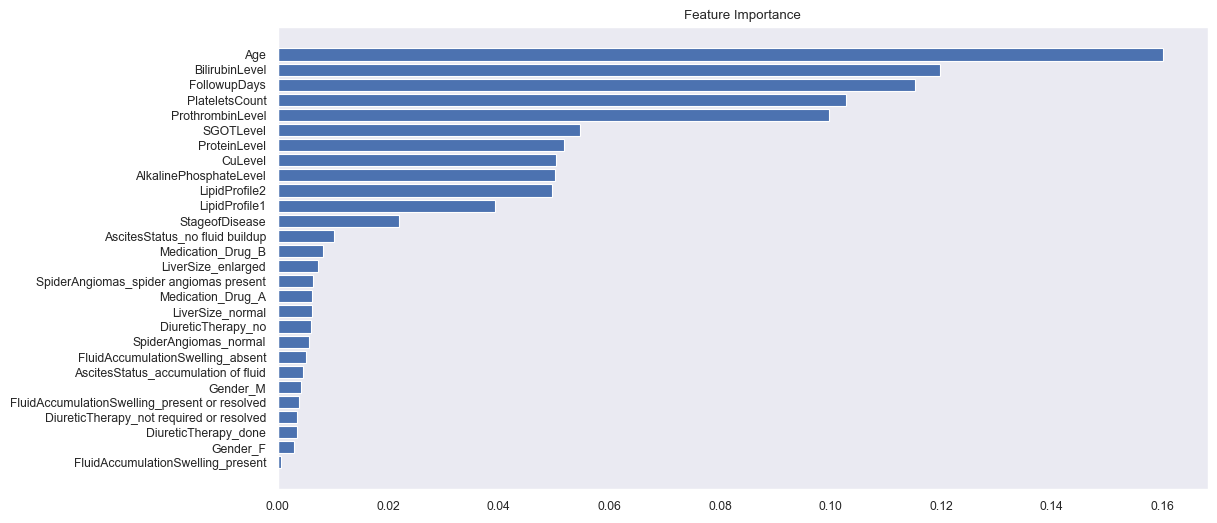

In [109]:
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


In [110]:
X_test.columns

Index(['FollowupDays', 'Age', 'BilirubinLevel', 'LipidProfile1',
       'ProteinLevel', 'CuLevel', 'AlkalinePhosphateLevel', 'SGOTLevel',
       'LipidProfile2', 'PlateletsCount', 'ProthrombinLevel', 'StageofDisease',
       'Medication_Drug_A', 'Medication_Drug_B', 'Gender_F', 'Gender_M',
       'AscitesStatus_accumulation of fluid', 'AscitesStatus_no fluid buildup',
       'LiverSize_enlarged', 'LiverSize_normal', 'SpiderAngiomas_normal',
       'SpiderAngiomas_spider angiomas present',
       'FluidAccumulationSwelling_absent', 'FluidAccumulationSwelling_present',
       'FluidAccumulationSwelling_present or resolved', 'DiureticTherapy_done',
       'DiureticTherapy_no', 'DiureticTherapy_not required or resolved'],
      dtype='object')

In [111]:
feature_imp_df = pd.DataFrame({'Feature':X_test.columns.tolist(),'Feature_importance':feature_importance})
feature_imp_df.sort_values(by='Feature_importance',ascending=False,inplace=True)
feature_imp_df.reset_index(drop=True,inplace=True)
feature_imp_df

,Feature,Feature_importance
0,Age,0.160253
1,BilirubinLevel,0.119762
2,FollowupDays,0.115323
3,PlateletsCount,0.102735
4,ProthrombinLevel,0.099745
5,SGOTLevel,0.054712
6,ProteinLevel,0.051847
7,CuLevel,0.050280
8,AlkalinePhosphateLevel,0.050134
9,LipidProfile2,0.049593


In [112]:
feature_importance

array([0.11532317, 0.16025311, 0.1197623 , 0.03934802, 0.05184708,
       0.05027962, 0.05013407, 0.05471204, 0.04959303, 0.10273505,
       0.09974471, 0.02199211, 0.00625316, 0.00818664, 0.00288252,
       0.00422853, 0.00465056, 0.01008821, 0.00728588, 0.00617281,
       0.0057132 , 0.00635697, 0.00513347, 0.00055585, 0.00379915,
       0.00343039, 0.00604421, 0.00349416])

In [113]:
df.columns

Index(['PatientID', 'FollowupDays', 'FinalStatus', 'Medication', 'Age',
       'Gender', 'AscitesStatus', 'LiverSize', 'SpiderAngiomas',
       'FluidAccumulationSwelling', 'BilirubinLevel', 'LipidProfile1',
       'ProteinLevel', 'CuLevel', 'AlkalinePhosphateLevel', 'SGOTLevel',
       'LipidProfile2', 'PlateletsCount', 'ProthrombinLevel', 'StageofDisease',
       'DiureticTherapy'],
      dtype='object')

##### Based on the graph above "Age","FollowupDays", "BilirubinLevel", "PlateletsCount",'ProthrombinLevel' contributes significantly to the progression of the disease, which are also important in predicting the FinalStatus Column

#### 7.Use unsupervised methods to see if you can find any insights from the dataset. Provide your insights with facts/charts.	

PatientID


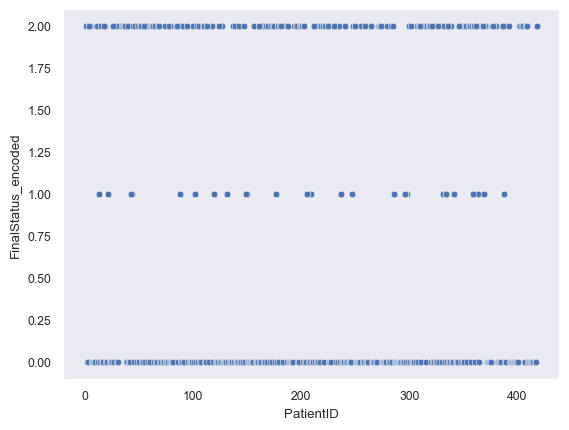

FollowupDays


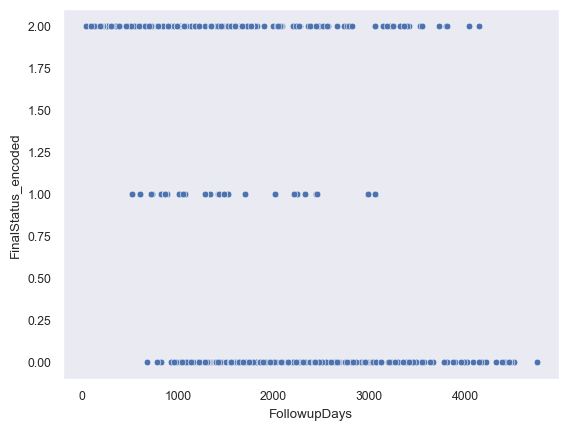

Age


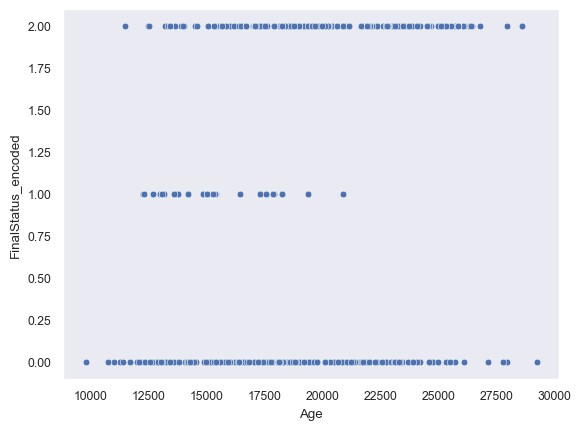

BilirubinLevel


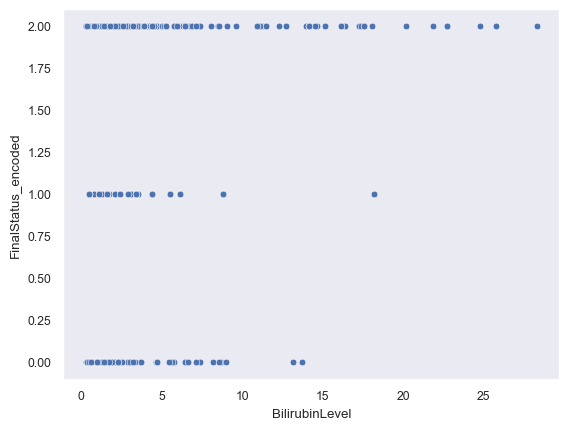

LipidProfile1


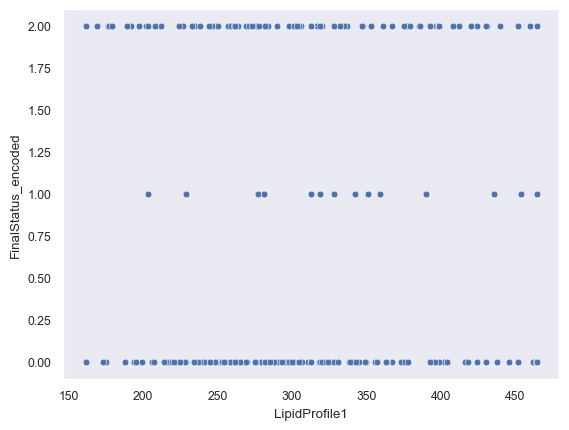

ProteinLevel


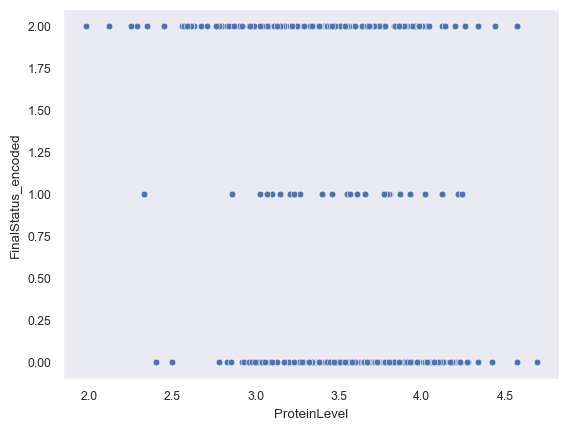

CuLevel


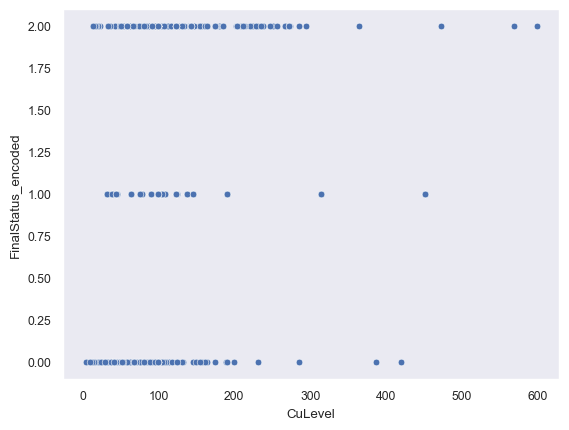

AlkalinePhosphateLevel


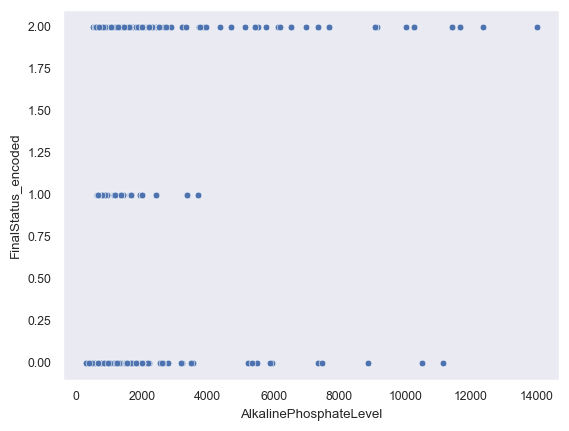

SGOTLevel


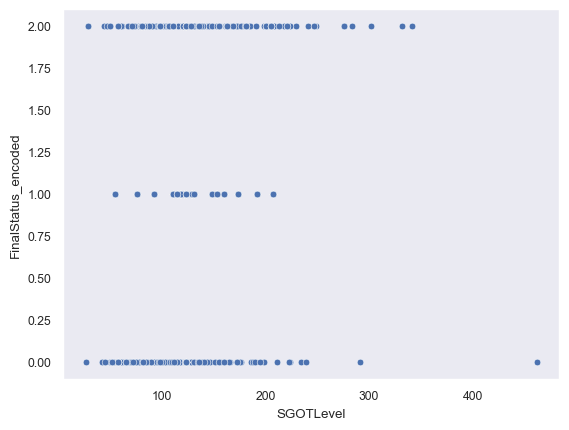

LipidProfile2


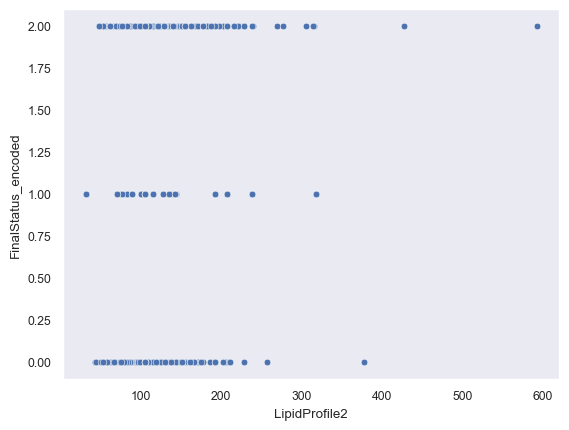

PlateletsCount


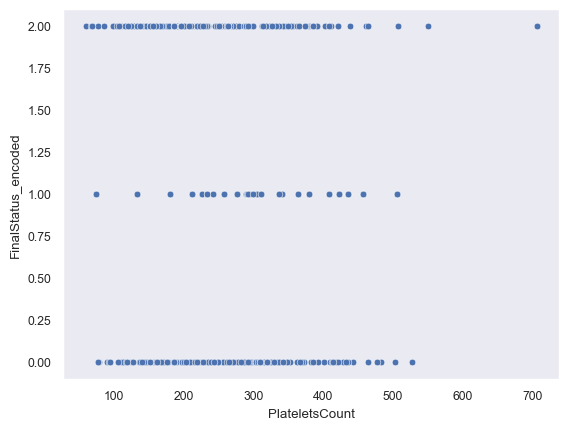

ProthrombinLevel


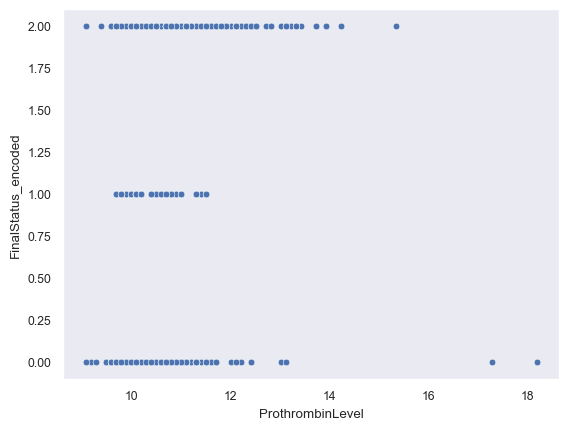

StageofDisease


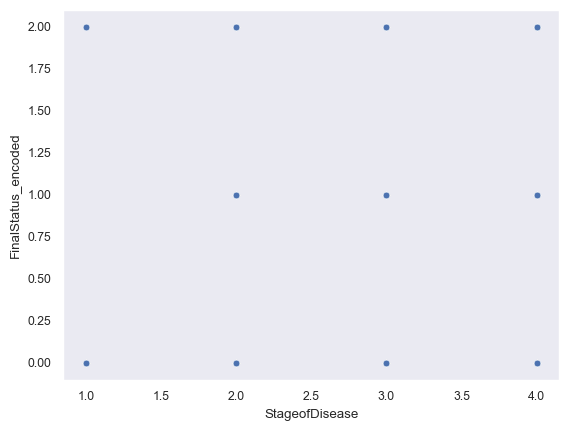

Medication_Drug_A


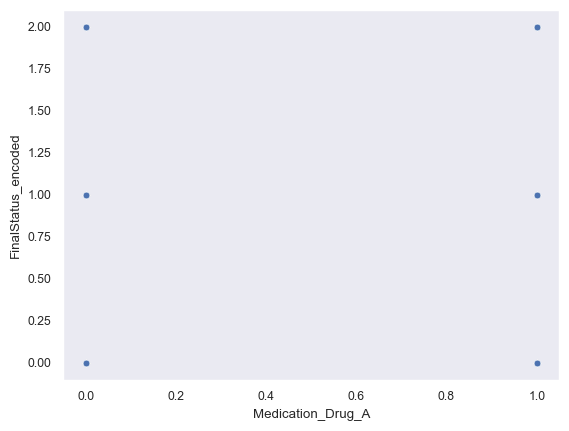

Medication_Drug_B


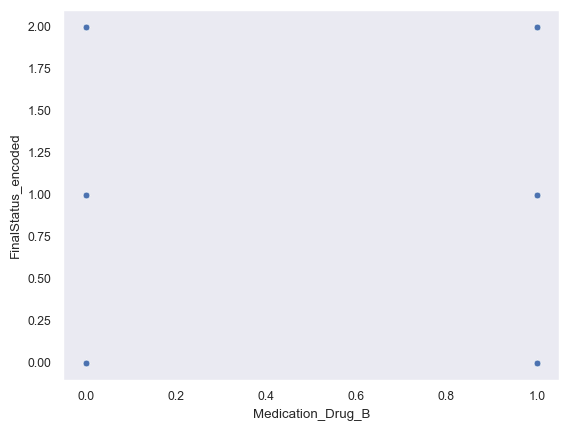

Gender_F


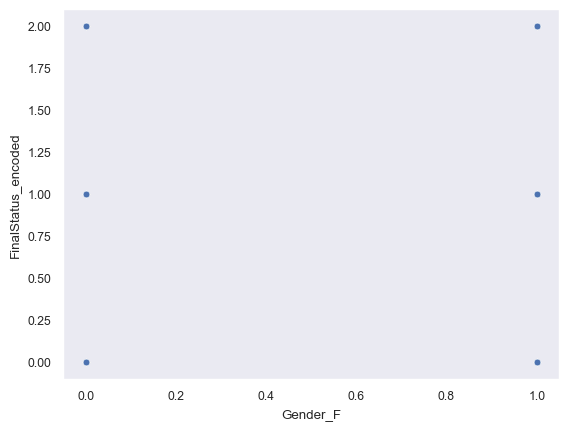

Gender_M


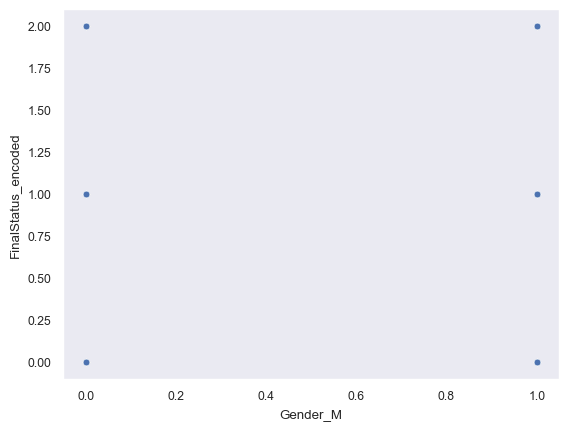

AscitesStatus_accumulation of fluid


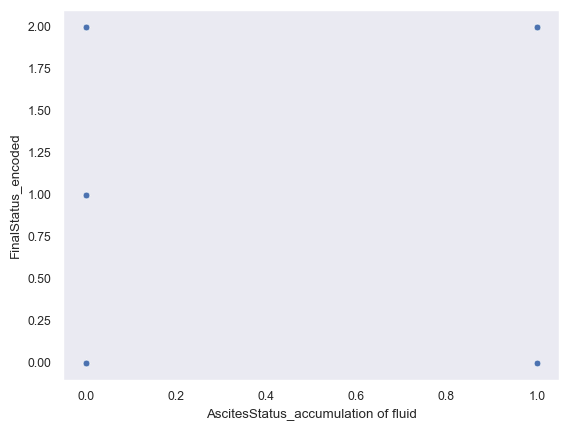

AscitesStatus_no fluid buildup


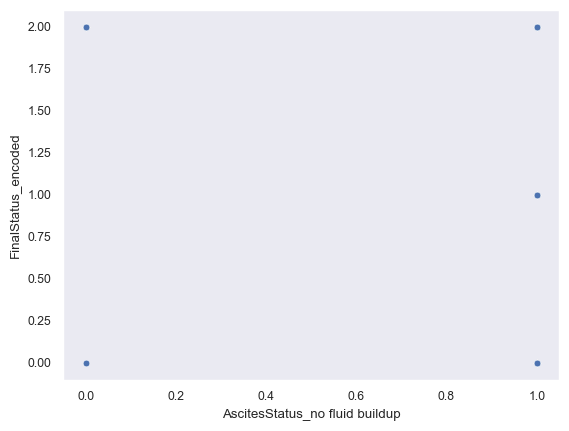

LiverSize_enlarged


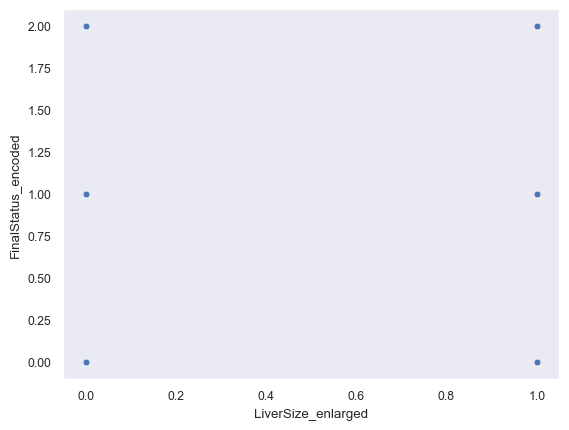

LiverSize_normal


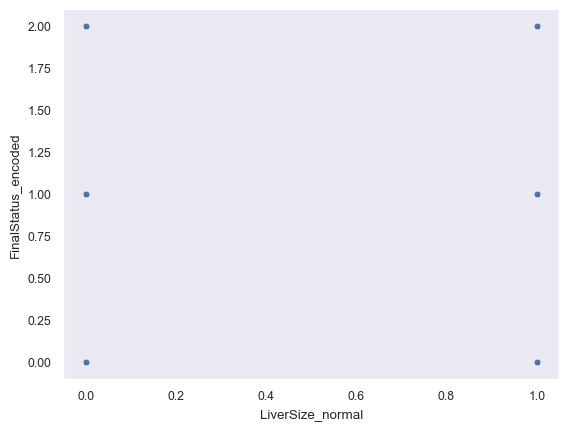

SpiderAngiomas_normal


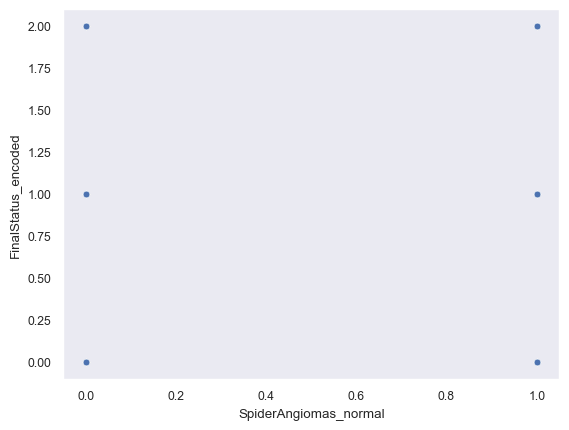

SpiderAngiomas_spider angiomas present


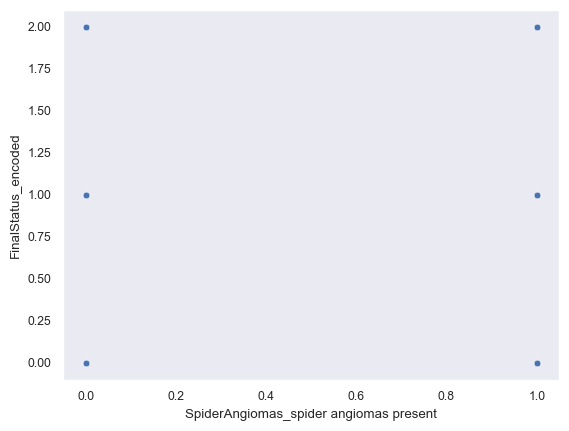

FluidAccumulationSwelling_absent


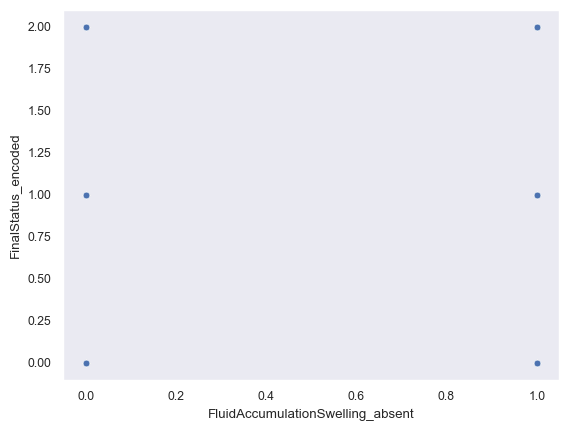

FluidAccumulationSwelling_present


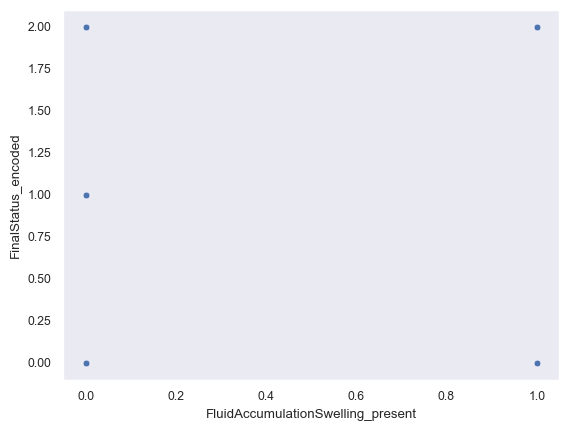

FluidAccumulationSwelling_present or resolved


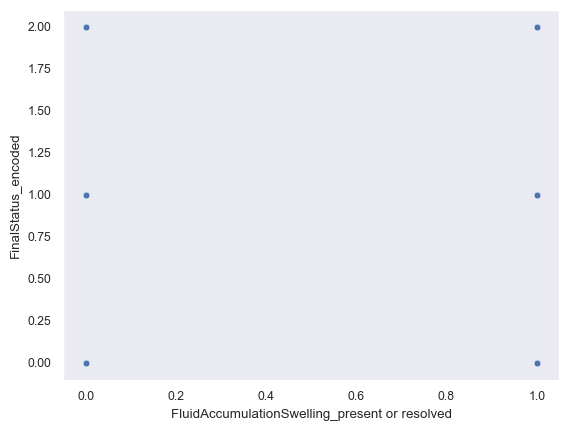

DiureticTherapy_done


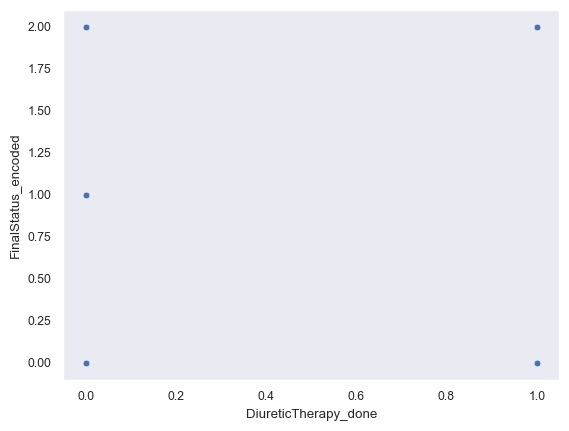

DiureticTherapy_no


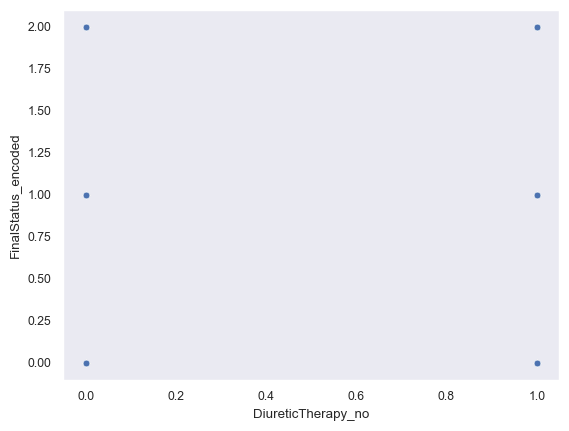

DiureticTherapy_not required or resolved


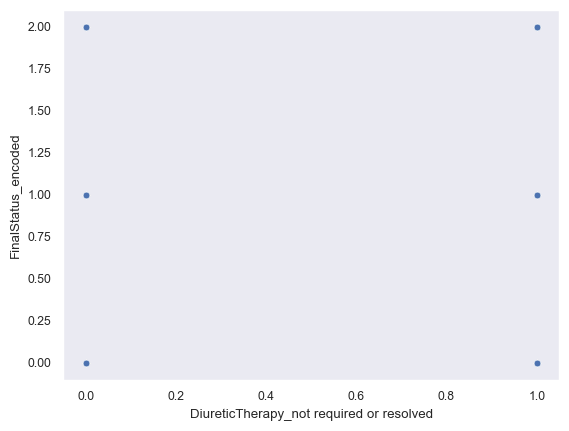

FinalStatus_encoded


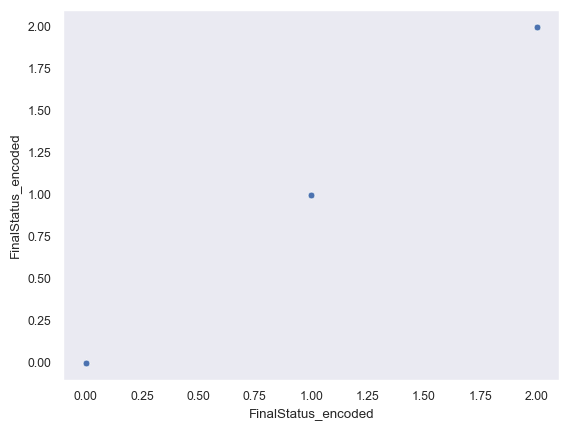

In [114]:
for col in df_combine:
    print(col)
    sns.scatterplot(x=col, y='FinalStatus_encoded', data=df_combine)
    plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

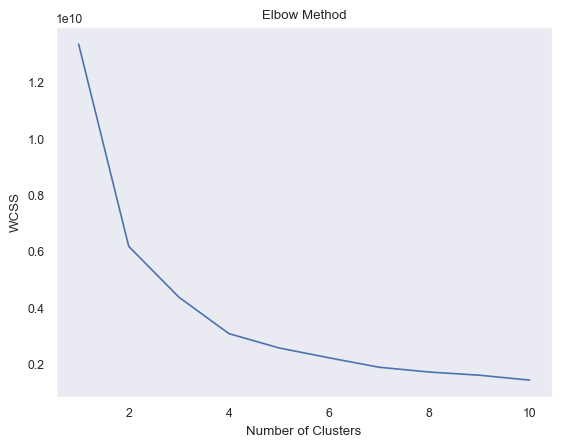

In [115]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 

# Elbow Method to Determine Number of Clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [116]:
X.head()

,FollowupDays,Age,BilirubinLevel,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,PlateletsCount,...,LiverSize_enlarged,LiverSize_normal,SpiderAngiomas_normal,SpiderAngiomas_spider angiomas present,FluidAccumulationSwelling_absent,FluidAccumulationSwelling_present,FluidAccumulationSwelling_present or resolved,DiureticTherapy_done,DiureticTherapy_no,DiureticTherapy_not required or resolved
0,1990,23843,1.11,312.5,3.73,99.13871,2002.482308,123.781923,106.0,136.000000,...,1,0,1,0,1,0,0,0,1,0
1,4747,12667,1.82,312.5,3.27,99.13871,2002.482308,123.781923,106.0,251.398034,...,1,0,1,0,1,0,0,0,1,0
2,1565,24961,0.71,312.5,3.09,99.13871,2002.482308,123.781923,106.0,161.000000,...,1,0,1,0,1,0,0,0,1,0
3,3249,19958,2.32,262.0,3.21,235.00000,11433.400000,106.840000,93.0,211.000000,...,1,0,1,0,0,0,1,0,0,1
4,138,25846,2.42,169.0,2.59,229.00000,1066.560000,122.110000,74.0,105.000000,...,0,1,0,1,0,1,0,1,0,0


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_16716\3957829328.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.iloc[pred_y == cluster_, 0],


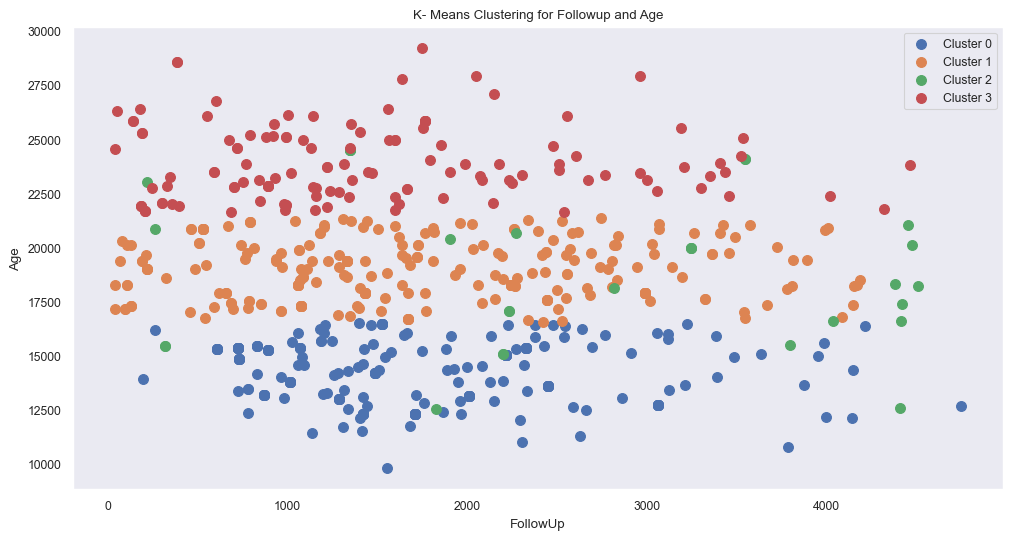

In [117]:
n_clusters = 4
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

pred_y = kmeans.predict(X)



plt.figure(figsize=(12, 6))


for cluster_ in range(n_clusters):
    plt.scatter(X.iloc[pred_y == cluster_, 0], 
                X.iloc[pred_y == cluster_, 1], 
                s=50, cmap='viridis', label=f'Cluster {cluster_}')
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=pred_y, s=50, cmap='viridis', label=f'Clusters {n_clusters}')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K- Means Clustering for Followup and Age')
plt.xlabel('FollowUp')
plt.ylabel('Age')
plt.legend()
plt.show()


Clusters are formed in such a way that there is a range defined based on the Age column, hence Age wise the Final Status changes

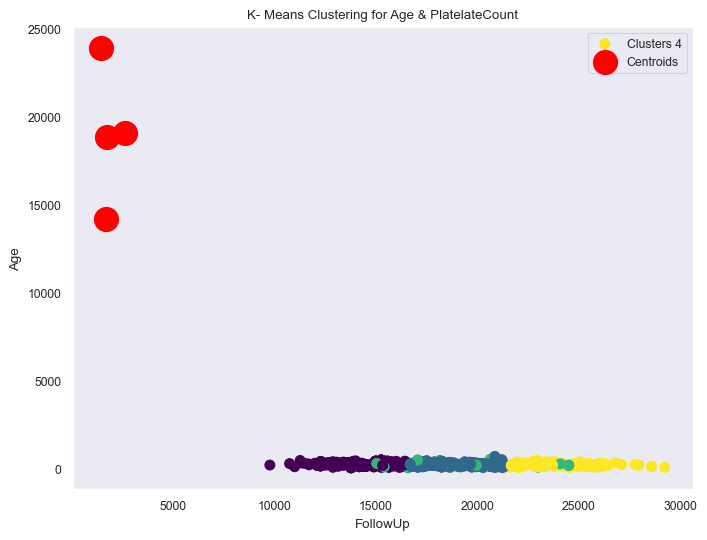

In [118]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 1], X.iloc[:, 9], c=pred_y, s=50, cmap='viridis', label=f'Clusters {n_clusters}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K- Means Clustering for Age & PlatelateCount')
plt.xlabel('FollowUp')
plt.ylabel('Age')
plt.legend()
plt.show()